In [54]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [55]:
import pandas as pd

# Data Stations

In [56]:
df_stations = pd.read_csv('stations.csv')
df_stations.head()

,station,region,state,station_code,first date,height,longitude,latitude
0,QUEIMADAS,NE,BA,A436,2008-05-23,315.0,-39.616944,-10.984645
1,MACAU,NE,RN,A317,2007-01-06,32.0,-36.573056,-5.151111
2,SAQUAREMA - SAMPAIO CORREIA,SE,RJ,A667,2019-01-01,26.0,-42.608889,-22.871111
3,SANTANA DO LIVRAMENTO,S,RS,A804,2001-11-22,328.0,-55.401389,-30.750556
4,VILA VELHA,SE,ES,A634,2017-02-15,25.0,-40.403889,-20.466944


## Analisa Data Stations (Sebelum)

### Mencari nilai null dan kosong

In [57]:
df_stations.isnull().sum()

station         0
region          0
state           0
station_code    0
first date      0
height          0
longitude       0
latitude        0
dtype: int64

In [58]:
df_stations.isna().sum()

station         0
region          0
state           0
station_code    0
first date      0
height          0
longitude       0
latitude        0
dtype: int64

### Mencari distribusi data

In [59]:
df_stations.describe()

,height,longitude,latitude
count,622.000000,622.000000,622.000000
mean,153.678087,-48.310529,-15.821457
std,1686.824775,7.355139,8.720538
min,-9999.000000,-79.494167,-84.000000
25%,109.715000,-52.856736,-22.346181
50%,346.000000,-48.168889,-16.375739
75%,624.750000,-42.720833,-8.809236
max,2450.000000,-29.316667,4.477500


### Mencari jumlah unik masing-masing data

In [60]:
df_stations.nunique()

station         620
region            5
state            27
station_code    611
first date      486
height          530
longitude       619
latitude        616
dtype: int64

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'latitude'}>, <AxesSubplot:>]],
      dtype=object)

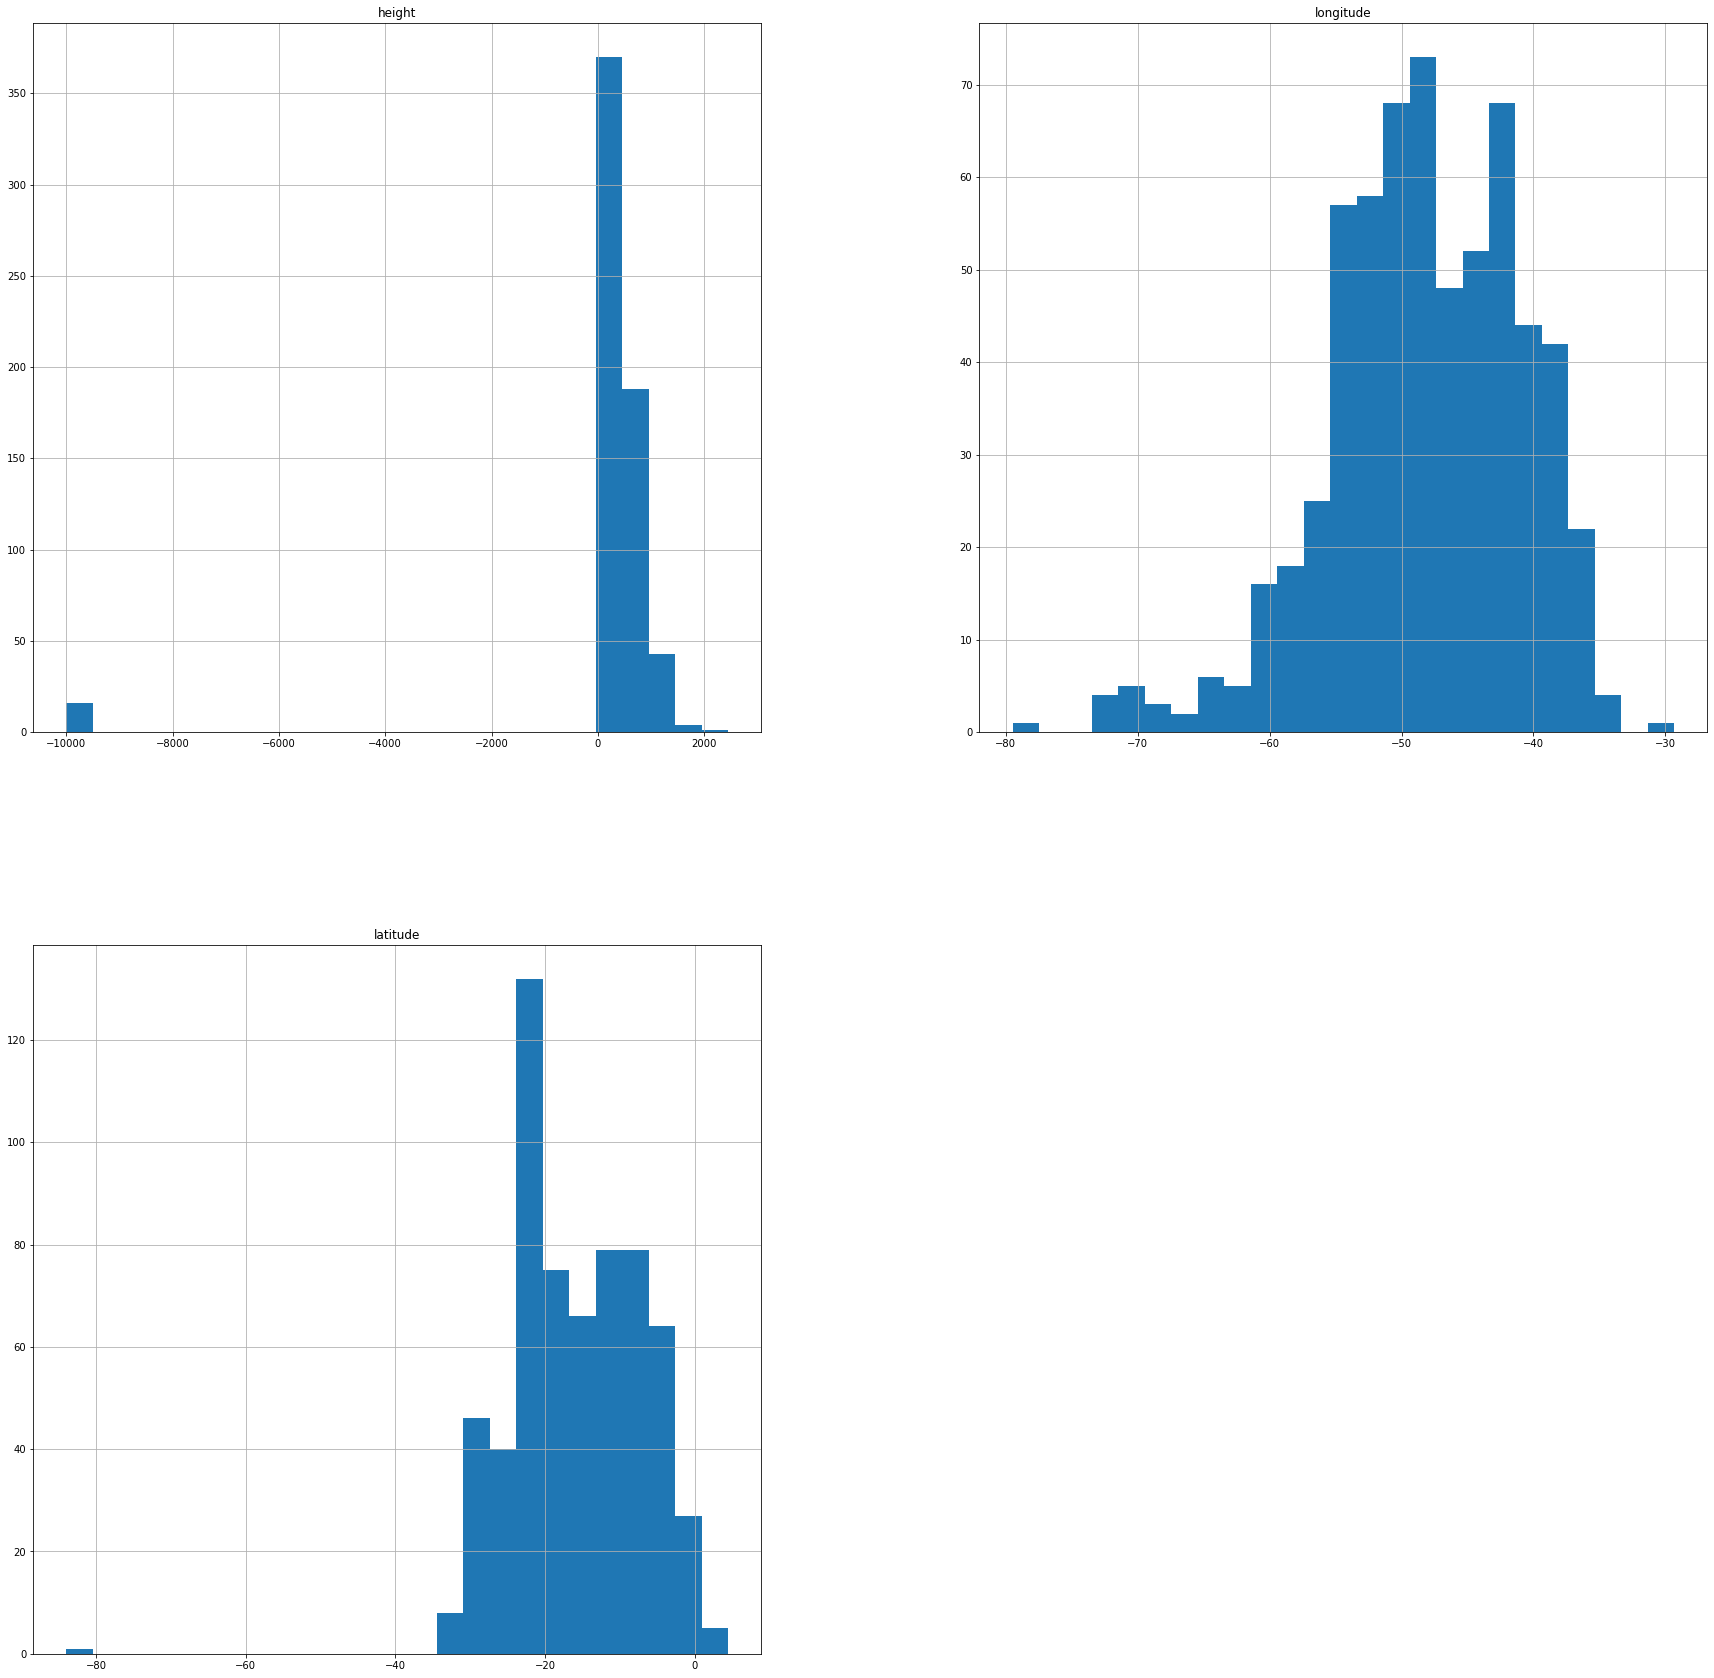

In [61]:
df_stations.hist(figsize = (30,30), bins=25)

### Mecari nilai duplikasi

In [62]:
dups_stations = df_stations.duplicated()
print(dups_stations.any())
print(df_stations[dups_stations])

False
Empty DataFrame
Columns: [station, region, state, station_code, first date, height, longitude, latitude]
Index: []


### Mencari outlayer dengan IQR

In [63]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
import numpy as np
# seed the random number generator
seed(1)
# generate univariate observations
# data = 5 * randn(10000) + 50
# calculate interquartile range
isNumeric =df_stations.select_dtypes(include=np.number)
# print(isNumeric)
for i in list(isNumeric):
    q25, q75 = percentile(df_stations[i], 25), percentile(df_stations[i], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
#     for x in range(len(df_central_west_pd[i])):
#         if df_central_west_pd[i][x] < lower or df_central_west_pd[i][x] > upper:
#             df_central_west_pd[i][x] = np.nan
    outliers = [x for x in df_stations[i] if x < lower or x > upper]

    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df_stations[i] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=109.715, 75th=624.750, IQR=515.035
Identified outliers: 22
Non-outlier observations: 600
Percentiles: 25th=-52.857, 75th=-42.721, IQR=10.136
Identified outliers: 13
Non-outlier observations: 609
Percentiles: 25th=-22.346, 75th=-8.809, IQR=13.537
Identified outliers: 1
Non-outlier observations: 621


## Pembersihan Data

### Pembersihan Outlayer

In [64]:
print(df_stations.shape)
isNumeric =df_stations.select_dtypes(include=np.number)
print(isNumeric)
for i in isNumeric:
    q25, q75 = percentile(df_stations[i], 25), percentile(df_stations[i], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    for x in range(len(df_stations[i])):
        if df_stations[i][x] < lower or df_stations[i][x] > upper:
            df_stations[i][x] = np.nan
print(df_stations.shape)

(622, 8)
     height  longitude   latitude
0    315.00 -39.616944 -10.984645
1     32.00 -36.573056  -5.151111
2     26.00 -42.608889 -22.871111
3    328.00 -55.401389 -30.750556
4     25.00 -40.403889 -20.466944
..      ...        ...        ...
617  980.00 -42.987222 -22.448889
618  609.33 -47.585552 -23.350000
619  447.75 -43.184167 -13.251094
620  132.11 -39.692500 -14.171304
621  213.00 -37.471389 -10.671667

[622 rows x 3 columns]
Percentiles: 25th=109.715, 75th=624.750, IQR=515.035
Percentiles: 25th=-52.857, 75th=-42.721, IQR=10.136
Percentiles: 25th=-22.346, 75th=-8.809, IQR=13.537
(622, 8)


C:\Users\jmspa\AppData\Local\Temp\ipykernel_4548\252108521.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stations[i][x] = np.nan


In [46]:
df_stations.isna().sum()

station          0
region           0
state            0
station_code     0
first date       0
height          22
longitude       13
latitude         1
dtype: int64

### Imputasi Simple Imputer Mean

In [48]:
from sklearn.impute import SimpleImputer
isNumeric =df_stations.select_dtypes(include=np.number)
imputer_mean = SimpleImputer(strategy='mean')
# fit on the dataset
imputer_mean.fit(isNumeric)
# transform the dataset
Xtrans_station_mean = imputer_mean.transform(isNumeric)
Xtrans_station_mean


array([[315.        , -39.61694443, -10.984645  ],
       [ 32.        , -36.57305554,  -5.15111111],
       [ 26.        , -42.60888888, -22.8711111 ],
       ...,
       [447.75      , -43.18416666, -13.251094  ],
       [132.11      , -39.69249999, -14.171304  ],
       [213.        , -37.47138888, -10.67166666]])

In [52]:
columns = ['height','longitude','latitude']
df_stations_mean = df_stations.copy()
for i in range(3):
    df_stations_mean[columns[i]]=Xtrans_station_mean[:,i]
df_stations_mean

,station,region,state,station_code,first date,height,longitude,latitude
0,QUEIMADAS,NE,BA,A436,2008-05-23,315.00,-39.616944,-10.984645
1,MACAU,NE,RN,A317,2007-01-06,32.00,-36.573056,-5.151111
2,SAQUAREMA - SAMPAIO CORREIA,SE,RJ,A667,2019-01-01,26.00,-42.608889,-22.871111
3,SANTANA DO LIVRAMENTO,S,RS,A804,2001-11-22,328.00,-55.401389,-30.750556
4,VILA VELHA,SE,ES,A634,2017-02-15,25.00,-40.403889,-20.466944
...,...,...,...,...,...,...,...,...
617,TERESOPOLIS,SE,RJ,A618,2006-11-01,980.00,-42.987222,-22.448889
618,SOROCABA,SE,SP,A713,2006-08-22,609.33,-47.585552,-23.350000
619,BOM JESUS DA LAPA,NE,BA,A418,2007-05-18,447.75,-43.184167,-13.251094
620,IPIAU,NE,BA,A445,2009-06-30,132.11,-39.692500,-14.171304


array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'latitude'}>, <AxesSubplot:>]],
      dtype=object)

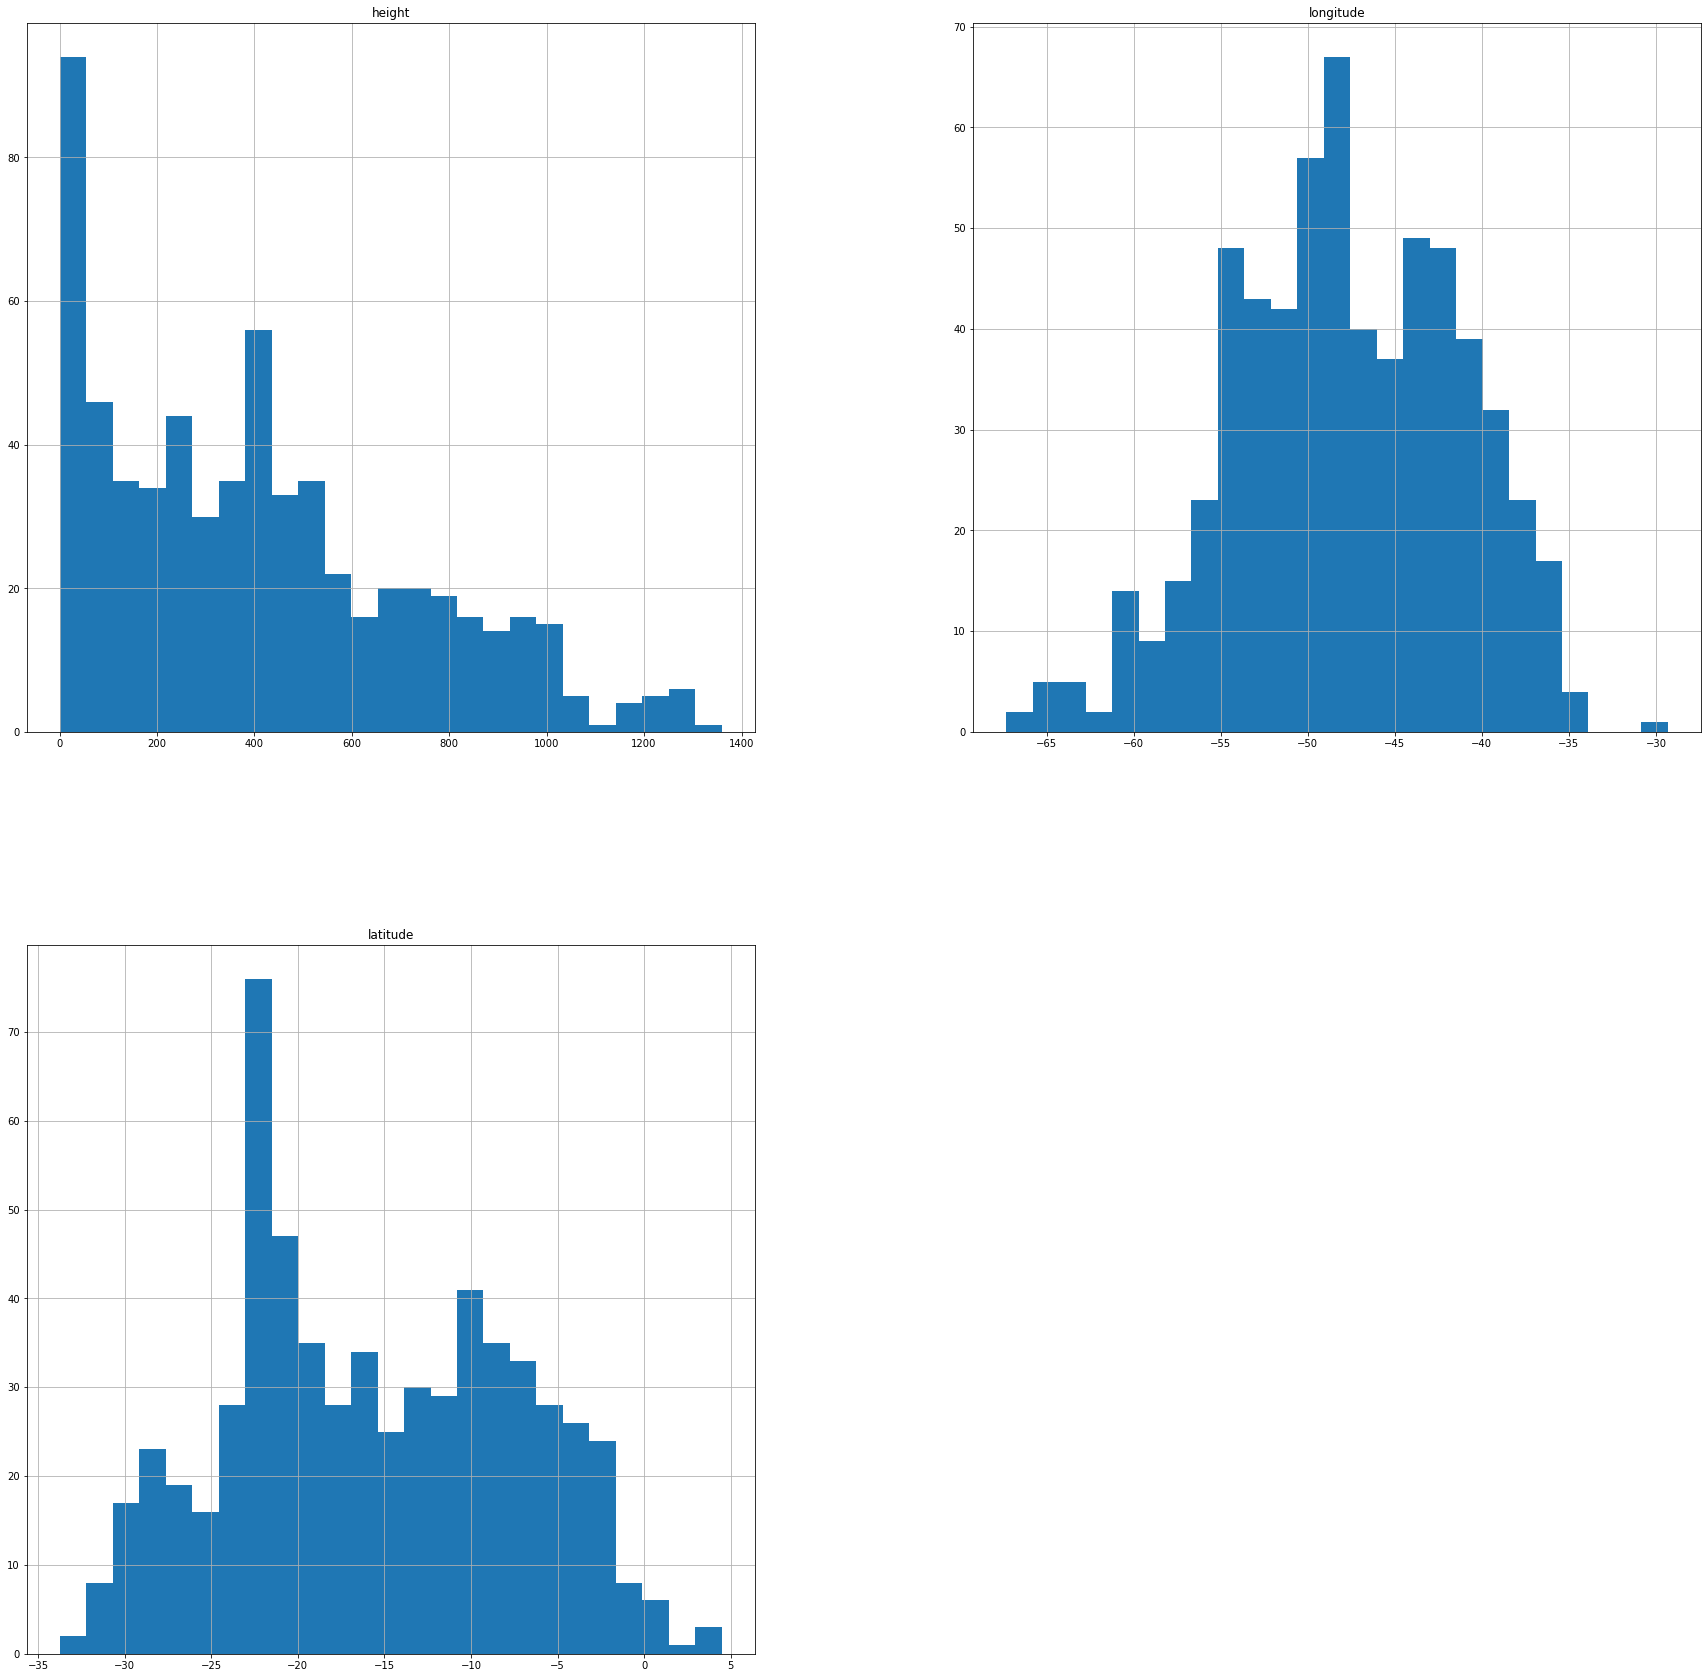

In [53]:
df_stations_mean.hist(figsize = (30,30), bins=25)

### Imputasi Simple Imputer Median

In [100]:
isNumeric =df_stations.select_dtypes(include=np.number)
imputer_median = SimpleImputer(strategy='median')
# fit on the dataset
imputer_median.fit(isNumeric)
# transform the dataset
Xtrans_station_median = imputer_median.transform(isNumeric)
Xtrans_station_median

array([[315.        , -39.61694443, -10.984645  ],
       [ 32.        , -36.57305554,  -5.15111111],
       [ 26.        , -42.60888888, -22.8711111 ],
       ...,
       [447.75      , -43.18416666, -13.251094  ],
       [132.11      , -39.69249999, -14.171304  ],
       [213.        , -37.47138888, -10.67166666]])

In [101]:
columns = ['height','longitude','latitude']
df_stations_median = df_stations.copy()
for i in range(3):
    df_stations_median[columns[i]]=Xtrans_station_median[:,i]
df_stations_median

,station,region,state,station_code,first date,height,longitude,latitude
0,QUEIMADAS,NE,BA,A436,2008-05-23,315.00,-39.616944,-10.984645
1,MACAU,NE,RN,A317,2007-01-06,32.00,-36.573056,-5.151111
2,SAQUAREMA - SAMPAIO CORREIA,SE,RJ,A667,2019-01-01,26.00,-42.608889,-22.871111
3,SANTANA DO LIVRAMENTO,S,RS,A804,2001-11-22,328.00,-55.401389,-30.750556
4,VILA VELHA,SE,ES,A634,2017-02-15,25.00,-40.403889,-20.466944
...,...,...,...,...,...,...,...,...
617,TERESOPOLIS,SE,RJ,A618,2006-11-01,980.00,-42.987222,-22.448889
618,SOROCABA,SE,SP,A713,2006-08-22,609.33,-47.585552,-23.350000
619,BOM JESUS DA LAPA,NE,BA,A418,2007-05-18,447.75,-43.184167,-13.251094
620,IPIAU,NE,BA,A445,2009-06-30,132.11,-39.692500,-14.171304


array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'latitude'}>, <AxesSubplot:>]],
      dtype=object)

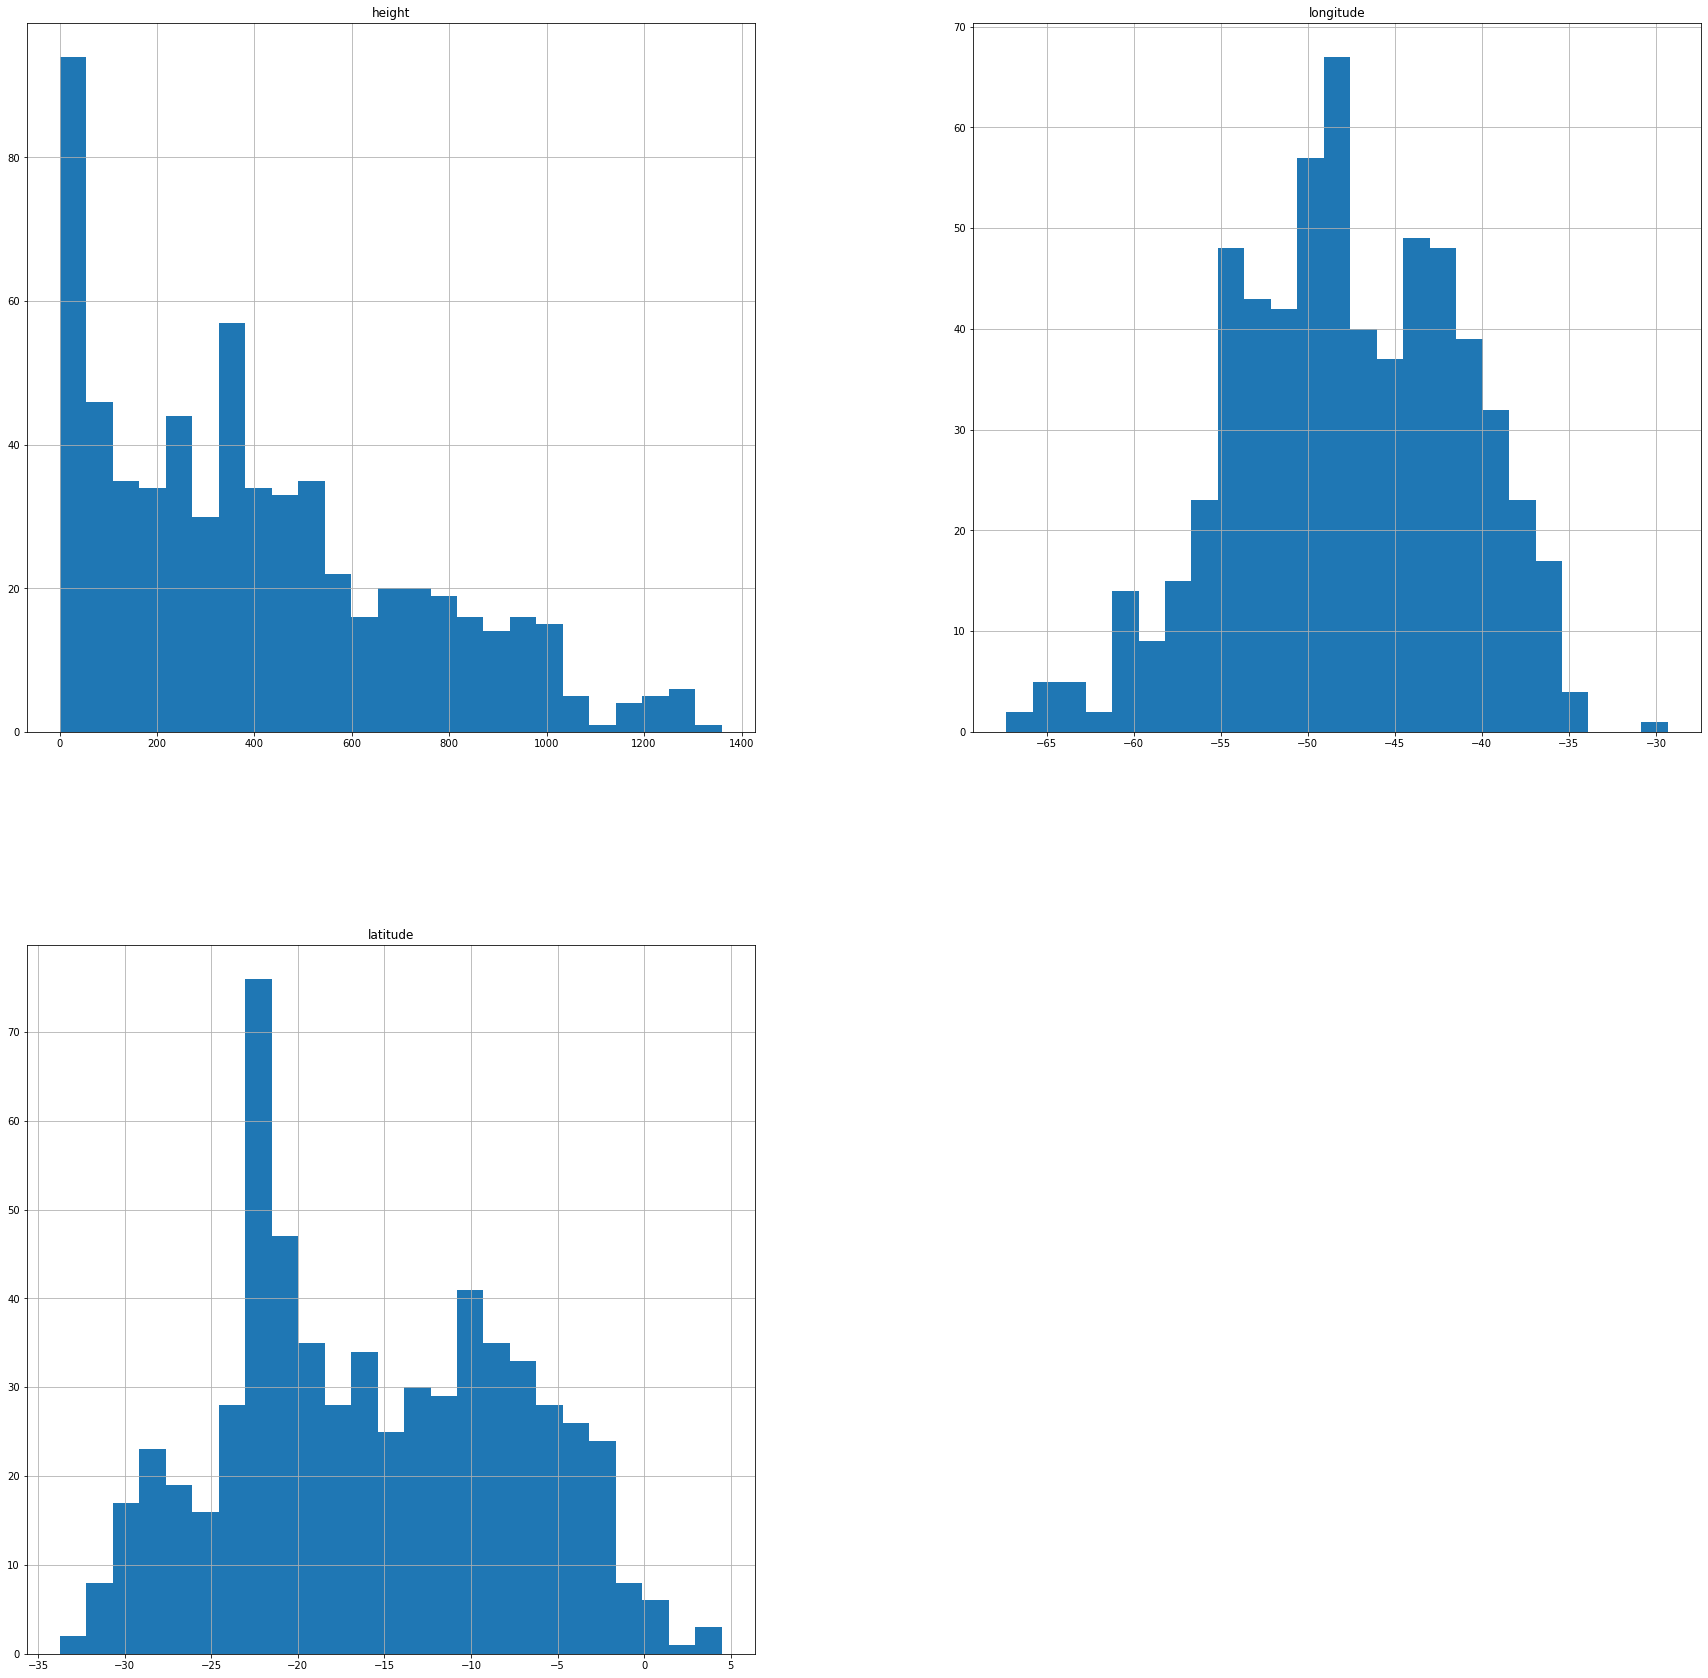

In [102]:
df_stations_median.hist(figsize = (30,30), bins=25)

# Data Central West

In [1]:
import pandas as pd
df_central_west = pd.read_csv('central_west.csv')
df_central_west

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391,26.5,17.7,...,39,9.6,3.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306,26.6,16.7,...,55,8.3,3.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167,27.3,15.8,...,62,8.3,3.6,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279,27.5,12.9,...,43,6.7,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753,27.5,13.7,...,98,6.4,3.5,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427115,138993,2017-12-20,09:00,0.0,898.8,898.8,898.5,29,18.4,15.8,...,72,3.5,1.7,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427116,138994,2017-12-20,10:00,0.0,899.4,899.4,898.8,557,20.3,16.9,...,69,3.5,1.8,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427117,138995,2017-12-20,11:00,0.0,899.7,899.7,899.4,1441,21.8,16.6,...,83,7.6,4.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427118,138996,2017-12-20,12:00,0.0,899.8,899.8,899.7,2334,23.2,17.3,...,59,7.6,3.7,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


## Analisa Data Central West

In [94]:
df_central_west.describe()

,index,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",latitude,longitude,height
count,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,...,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07,1.142712e+07
mean,1.760527e+05,-1.783119e+03,-5.306894e+02,-5.345710e+02,-5.360152e+02,-4.589726e+03,-1.281014e+03,-1.463842e+03,-1.286571e+03,-1.288551e+03,...,-1.472771e+03,-1.411187e+03,-1.420959e+03,-1.409338e+03,-1.341598e+03,-1.416346e+03,-1.408084e+03,-1.685276e+01,-5.360949e+01,5.045352e+02
std,1.121577e+05,3.827688e+03,3.750987e+03,3.755439e+03,3.756223e+03,5.970796e+03,3.373247e+03,3.555377e+03,3.380272e+03,3.380612e+03,...,3.563555e+03,3.569185e+03,3.571488e+03,3.563660e+03,3.619071e+03,3.491853e+03,3.480133e+03,3.624184e+00,3.399985e+00,2.776559e+02
min,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,...,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-2.396694e+01,-5.987306e+01,5.000000e+00
25%,7.910300e+04,0.000000e+00,9.233000e+02,9.234000e+02,9.228000e+02,-9.999000e+03,1.920000e+01,1.060000e+01,1.970000e+01,1.860000e+01,...,1.000000e+01,4.400000e+01,3.600000e+01,4.000000e+01,4.000000e+01,1.300000e+00,0.000000e+00,-1.969528e+01,-5.610000e+01,3.130000e+02
50%,1.661590e+05,0.000000e+00,9.553000e+02,9.555000e+02,9.549000e+02,-9.999000e+03,2.290000e+01,1.730000e+01,2.350000e+01,2.240000e+01,...,1.680000e+01,7.100000e+01,6.200000e+01,6.700000e+01,1.250000e+02,3.400000e+00,1.200000e+00,-1.664278e+01,-5.450169e+01,4.320000e+02
75%,2.657050e+05,0.000000e+00,9.741000e+02,9.744000e+02,9.738000e+02,1.124000e+03,2.690000e+01,2.050000e+01,2.780000e+01,2.600000e+01,...,2.000000e+01,8.800000e+01,8.300000e+01,8.600000e+01,2.380000e+02,5.700000e+00,2.400000e+00,-1.413306e+01,-5.114889e+01,6.750000e+02
max,4.199350e+05,9.600000e+01,1.028800e+03,1.030600e+03,1.028100e+03,4.889800e+04,4.500000e+01,4.480000e+01,4.500000e+01,4.500000e+01,...,4.470000e+01,1.000000e+02,1.000000e+02,1.000000e+02,3.600000e+02,4.940000e+01,2.000000e+01,-9.563333e+00,-4.636639e+01,1.264700e+03


### Mencari nilai nan

In [95]:
df_central_west.isna().sum()

index                                                    0
Data                                                     0
Hora                                                     0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (Kj/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELATIVA DO AR, HORARIA (%)                     

### Mencari Data dengan Single Value

In [96]:
counts = df_central_west.nunique()
counts

index                                                    419936
Data                                                       7664
Hora                                                         24
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            370
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)      1605
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)            1701
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)           1692
RADIACAO GLOBAL (Kj/m²)                                   29575
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                515
TEMPERATURA DO PONTO DE ORVALHO (°C)                        507
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  516
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  511
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            531
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            491
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                     97
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)

### Visualisasi Data

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'}>,
        <AxesSubplot:title={'center':'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'}>],
       [<AxesSubplot:title={'center':'RADIACAO GLOBAL (Kj/m²)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO PONTO DE ORVALHO (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'}>],
       [<AxesSubplot:title={'center':'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'}>,
        <AxesS

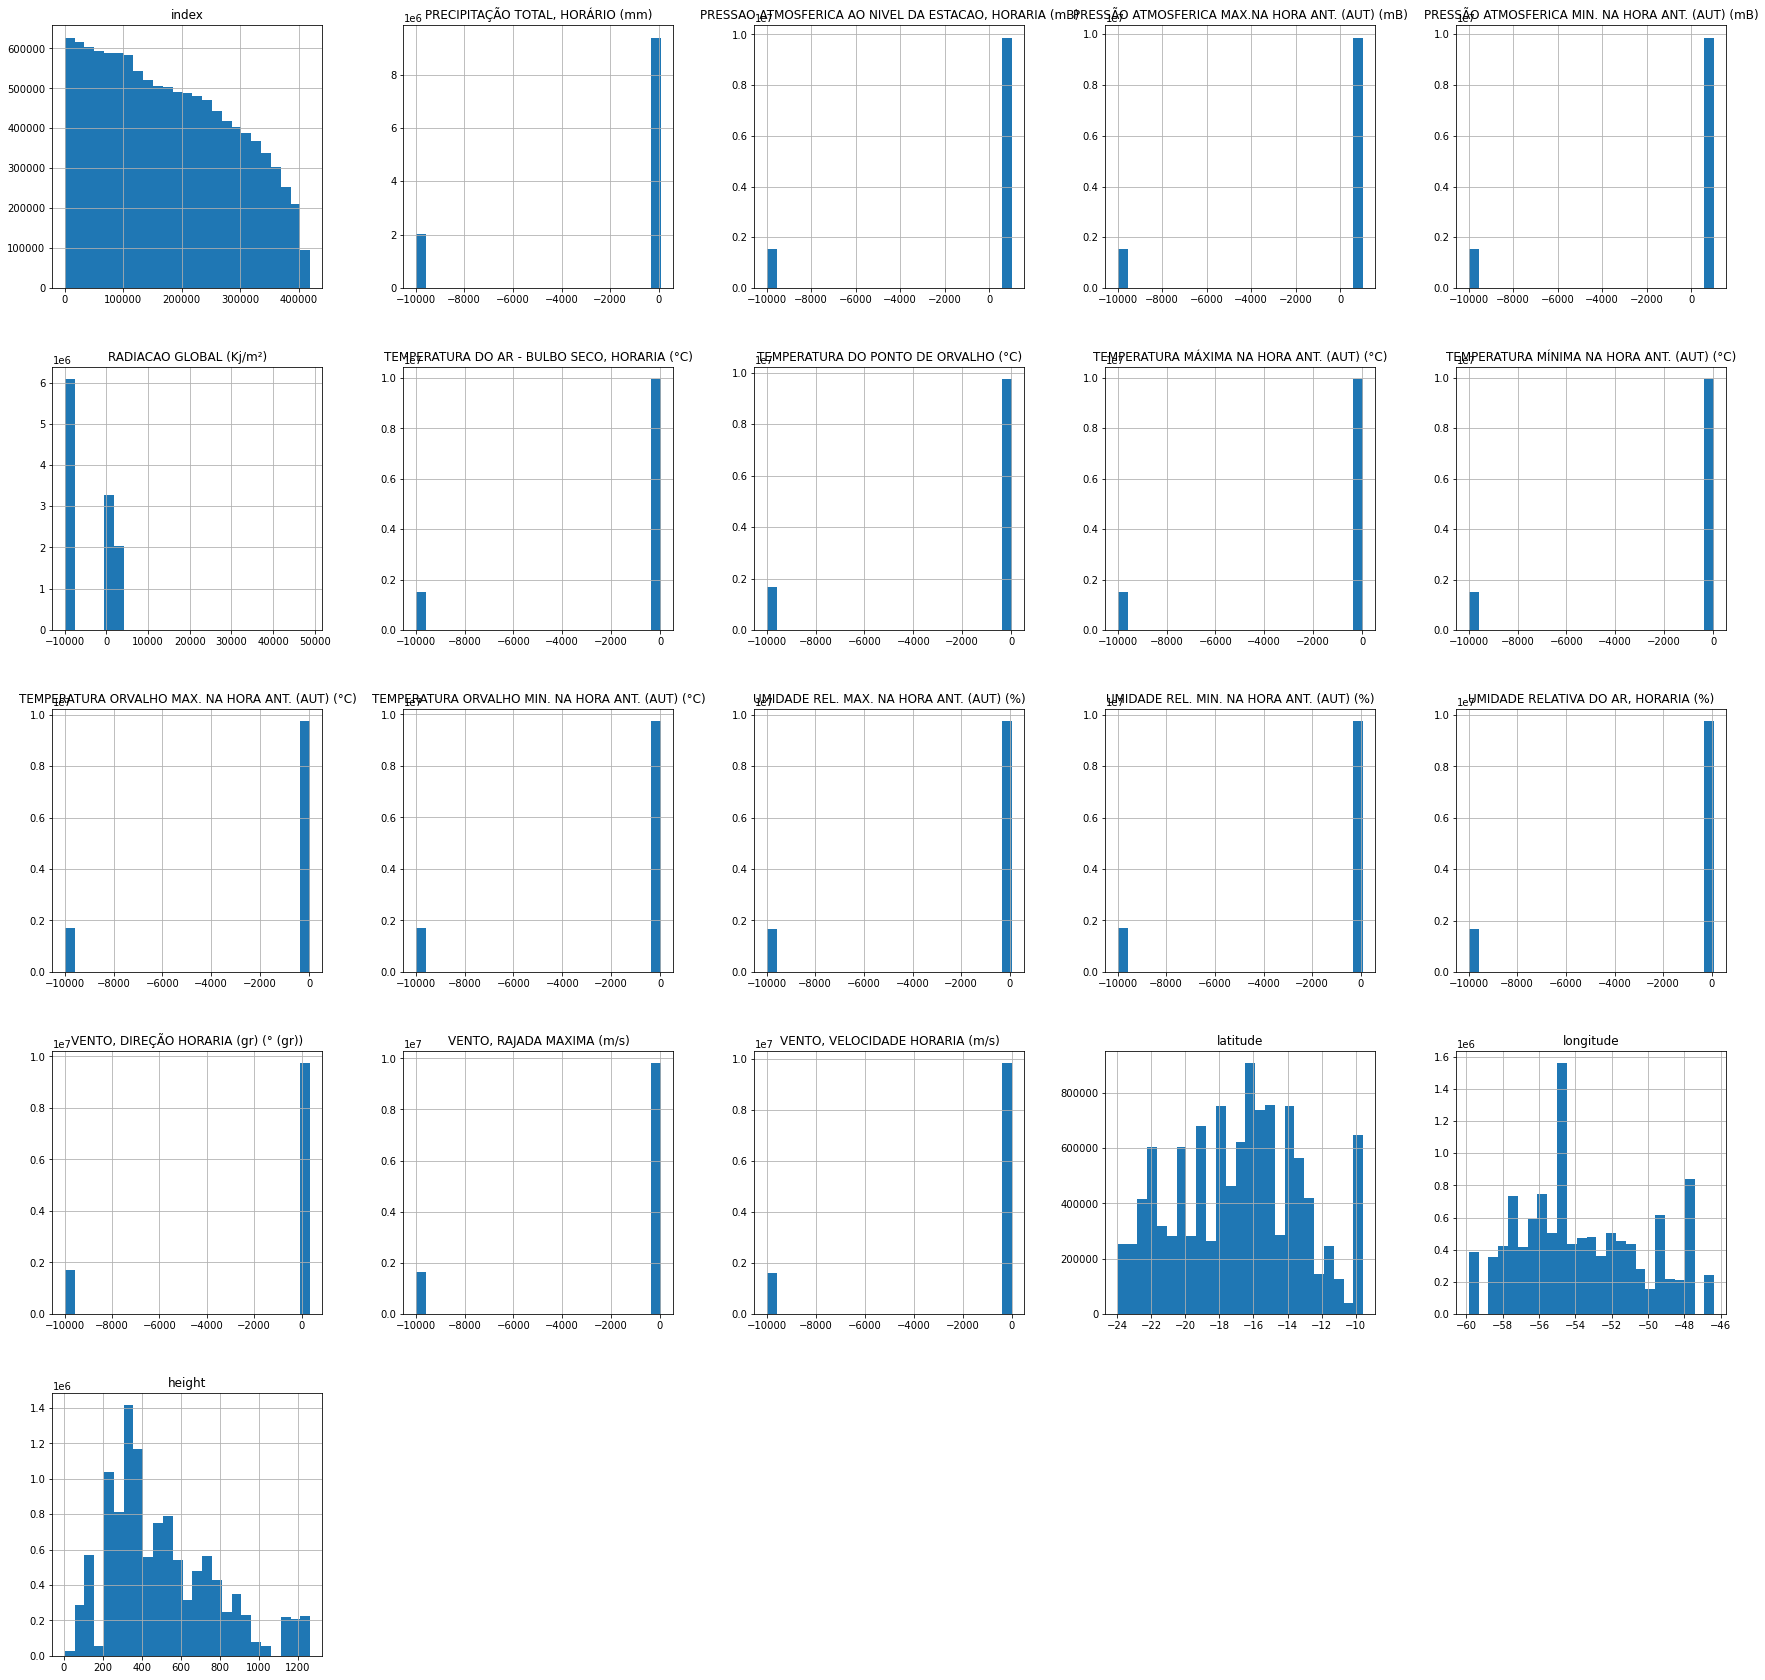

In [97]:
df_central_west.hist(figsize = (30,30), bins=25)

CPU times: total: 16.7 s
Wall time: 17 s


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'),
  Text(2, 0, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'),
  Text(3, 0, 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'),
  Text(4, 0, 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'),
  Text(5, 0, 'RADIACAO GLOBAL (Kj/m²)'),
  Text(6, 0, 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'),
  Text(7, 0, 'TEMPERATURA DO PONTO DE ORVALHO (°C)'),
  Text(8, 0, 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'),
  Text(9, 0, 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'),
  Text(10, 0, 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'),
  Text(11, 0, 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'),
  Text(12, 0, 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'),
  Text(13, 0, 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'),
  Text(14, 0, 'UMIDADE RELATIVA DO AR, HORARIA (%)'),
  Text(15, 0, 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))'),
  Text(16, 0

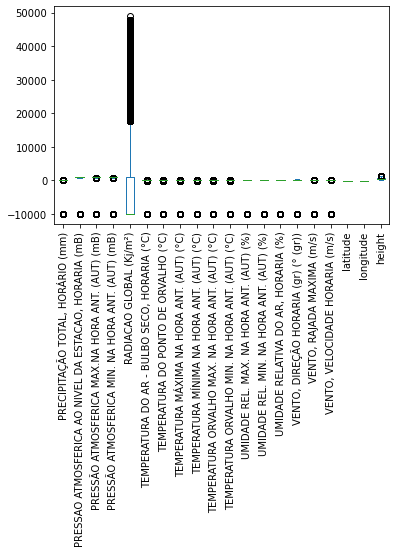

In [98]:
%%time
import matplotlib.pyplot as plt
df_central_west.drop(columns = ['index']).plot.box()
plt.xticks(rotation=90)

### Identifikasi pencilan dengan IQR

In [80]:
isNumeric =df_central_west.select_dtypes(include=np.number)
# print(isNumeric)
for i in list(isNumeric):
    q25, q75 = percentile(df_central_west[i], 25), percentile(df_central_west[i], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
#     for x in range(len(df_central_west_pd[i])):
#         if df_central_west_pd[i][x] < lower or df_central_west_pd[i][x] > upper:
#             df_central_west_pd[i][x] = np.nan
    outliers = [x for x in df_central_west[i] if x < lower or x > upper]

    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df_central_west[i] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
df_central_west

Percentiles: 25th=79103.000, 75th=265705.000, IQR=186602.000
Identified outliers: 0
Non-outlier observations: 11427120
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 2651922
Non-outlier observations: 8775198
Percentiles: 25th=923.300, 75th=974.100, IQR=50.800
Identified outliers: 1550070
Non-outlier observations: 9877050
Percentiles: 25th=923.400, 75th=974.400, IQR=51.000
Identified outliers: 1557471
Non-outlier observations: 9869649
Percentiles: 25th=922.800, 75th=973.800, IQR=51.000
Identified outliers: 1557795
Non-outlier observations: 9869325
Percentiles: 25th=-9999.000, 75th=1124.000, IQR=11123.000
Identified outliers: 24371
Non-outlier observations: 11402749
Percentiles: 25th=19.200, 75th=26.900, IQR=7.700
Identified outliers: 1510806
Non-outlier observations: 9916314
Percentiles: 25th=10.600, 75th=20.500, IQR=9.900
Identified outliers: 1692447
Non-outlier observations: 9734673
Percentiles: 25th=19.700, 75th=27.800, IQR=8.100
Identified outliers: 1508999
Non-

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391,26.5,17.7,...,39,9.6,3.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306,26.6,16.7,...,55,8.3,3.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167,27.3,15.8,...,62,8.3,3.6,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279,27.5,12.9,...,43,6.7,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753,27.5,13.7,...,98,6.4,3.5,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400240,138993,2017-12-20,09:00,0.0,898.8,898.8,898.5,29,18.4,15.8,...,72,3.5,1.7,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
400241,138994,2017-12-20,10:00,0.0,899.4,899.4,898.8,557,20.3,16.9,...,69,3.5,1.8,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
400242,138995,2017-12-20,11:00,0.0,899.7,899.7,899.4,1441,21.8,16.6,...,83,7.6,4.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
400243,138996,2017-12-20,12:00,0.0,899.8,899.8,899.7,2334,23.2,17.3,...,59,7.6,3.7,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


## Pembersihan Data

### Pembersihan Data Duplicate

In [2]:
dups = df_central_west.duplicated()
print(dups.any())
print(df_central_west[dups])

False
Empty DataFrame
Columns: [index, Data, Hora, PRECIPITAÇÃO TOTAL, HORÁRIO (mm), PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB), PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB), PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB), RADIACAO GLOBAL (Kj/m²), TEMPERATURA DO AR - BULBO SECO, HORARIA (°C), TEMPERATURA DO PONTO DE ORVALHO (°C), TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C), TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C), TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C), TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C), UMIDADE REL. MAX. NA HORA ANT. (AUT) (%), UMIDADE REL. MIN. NA HORA ANT. (AUT) (%), UMIDADE RELATIVA DO AR, HORARIA (%), VENTO, DIREÇÃO HORARIA (gr) (° (gr)), VENTO, RAJADA MAXIMA (m/s), VENTO, VELOCIDADE HORARIA (m/s), region, state, station, station_code, latitude, longitude, height]
Index: []

[0 rows x 27 columns]


In [3]:
print(df_central_west.shape)

(11427120, 27)


In [4]:
df_central_west.drop_duplicates(inplace=True)
print(df_central_west.shape)

(11427120, 27)


### Menghitung presentasi nilai unik di setiap kolom

In [6]:
for i in list(df_central_west):
	num = len(pd.unique(df_central_west[i]))
	percentage = float(num) / df_central_west.shape[0] * 100
	print(i,' %d, %.1f%%' % (num, percentage))

index  419936, 3.7%
Data  7664, 0.1%
Hora  24, 0.0%
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  370, 0.0%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  1605, 0.0%
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  1701, 0.0%
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  1692, 0.0%
RADIACAO GLOBAL (Kj/m²)  29575, 0.3%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  515, 0.0%
TEMPERATURA DO PONTO DE ORVALHO (°C)  507, 0.0%
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)  516, 0.0%
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)  511, 0.0%
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)  531, 0.0%
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  491, 0.0%
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  97, 0.0%
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  97, 0.0%
UMIDADE RELATIVA DO AR, HORARIA (%)  95, 0.0%
VENTO, DIREÇÃO HORARIA (gr) (° (gr))  361, 0.0%
VENTO, RAJADA MAXIMA (m/s)  289, 0.0%
VENTO, VELOCIDADE HORARIA (m/s)  180, 0.0%
region  1, 0.0%
state  4, 0.0%
station  116, 0.0%
station_code  115, 0.

### Menghapus kolom dengan hanya satu nilai unik

In [2]:
counts = df_central_west.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
print(df_central_west.shape)
for i in to_del: 
    df_central_west.drop(df_central_west.columns[i], axis=1, inplace=True)
    print(df_central_west.shape)

[20]
(11427120, 27)
(11427120, 26)


### Mengubah data outlayer RADIACAO GLOBAL (Kj/m²) menjadi nan

In [6]:
from numpy import percentile
import numpy as np
q25, q75 = percentile(df_central_west['RADIACAO GLOBAL (Kj/m²)'], 25), percentile(df_central_west['RADIACAO GLOBAL (Kj/m²)'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
for x in range(len(df_central_west['RADIACAO GLOBAL (Kj/m²)'])):
    if df_central_west['RADIACAO GLOBAL (Kj/m²)'][x] < lower or df_central_west['RADIACAO GLOBAL (Kj/m²)'][x] > upper:
        df_central_west['RADIACAO GLOBAL (Kj/m²)'][x] = np.nan


Percentiles: 25th=-9999.000, 75th=1124.000, IQR=11123.000


C:\Users\jmspa\AppData\Local\Temp\ipykernel_7864\3902944252.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_central_west['RADIACAO GLOBAL (Kj/m²)'][x] = np.nan


### Mengubah data -9999.0 menjadi Nan

In [7]:
import numpy as np
isNumeric =df_central_west.select_dtypes(include=np.number)
# print(isNumeric)
for i in list(isNumeric):
    df_central_west[i] = df_central_west[i].replace(-9999.0,np.nan)
df_central_west

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,...,59.0,39.0,9.6,3.9,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,...,54.0,55.0,8.3,3.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,...,49.0,62.0,8.3,3.6,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,...,41.0,43.0,6.7,3.1,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,...,43.0,98.0,6.4,3.5,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427115,138993,2017-12-20,09:00,0.0,898.8,898.8,898.5,29.0,18.4,15.8,...,85.0,72.0,3.5,1.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427116,138994,2017-12-20,10:00,0.0,899.4,899.4,898.8,557.0,20.3,16.9,...,81.0,69.0,3.5,1.8,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427117,138995,2017-12-20,11:00,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,...,72.0,83.0,7.6,4.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427118,138996,2017-12-20,12:00,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,...,70.0,59.0,7.6,3.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


### Imputasi Iteratif Mean

In [8]:
from sklearn.impute import SimpleImputer
isNumeric =df_central_west.select_dtypes(include=np.number)
imputer_mean = SimpleImputer(strategy='mean')
# fit on the dataset
imputer_mean.fit(isNumeric)
# transform the dataset
Xtrans_central_west_mean = imputer_mean.transform(isNumeric)
Xtrans_central_west_mean


array([[ 1.38998000e+05,  0.00000000e+00,  8.99600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38999000e+05,  0.00000000e+00,  8.99200000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.39000000e+05,  0.00000000e+00,  8.98600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       ...,
       [ 1.38995000e+05,  0.00000000e+00,  8.99700000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38996000e+05,  0.00000000e+00,  8.99800000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38997000e+05,  0.00000000e+00,  8.99900000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03]])

In [19]:
columns = list(df_central_west.select_dtypes(include=np.number).columns)
df_central_west_mean = df_central_west.copy()
for i in range(len(columns)):
    df_central_west_mean[columns[i]]=Xtrans_central_west_mean[:,i]
df_central_west_mean

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",state,station,station_code,latitude,longitude,height
0,138998.0,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,...,59.0,39.0,9.6,3.9,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999.0,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,...,54.0,55.0,8.3,3.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000.0,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,...,49.0,62.0,8.3,3.6,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001.0,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,...,41.0,43.0,6.7,3.1,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002.0,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,...,43.0,98.0,6.4,3.5,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427115,138993.0,2017-12-20,09:00,0.0,898.8,898.8,898.5,29.0,18.4,15.8,...,85.0,72.0,3.5,1.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427116,138994.0,2017-12-20,10:00,0.0,899.4,899.4,898.8,557.0,20.3,16.9,...,81.0,69.0,3.5,1.8,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427117,138995.0,2017-12-20,11:00,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,...,72.0,83.0,7.6,4.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427118,138996.0,2017-12-20,12:00,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,...,70.0,59.0,7.6,3.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


### Visualisasi

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'}>,
        <AxesSubplot:title={'center':'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'}>],
       [<AxesSubplot:title={'center':'RADIACAO GLOBAL (Kj/m²)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO PONTO DE ORVALHO (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'}>],
       [<AxesSubplot:title={'center':'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'}>,
        <AxesS

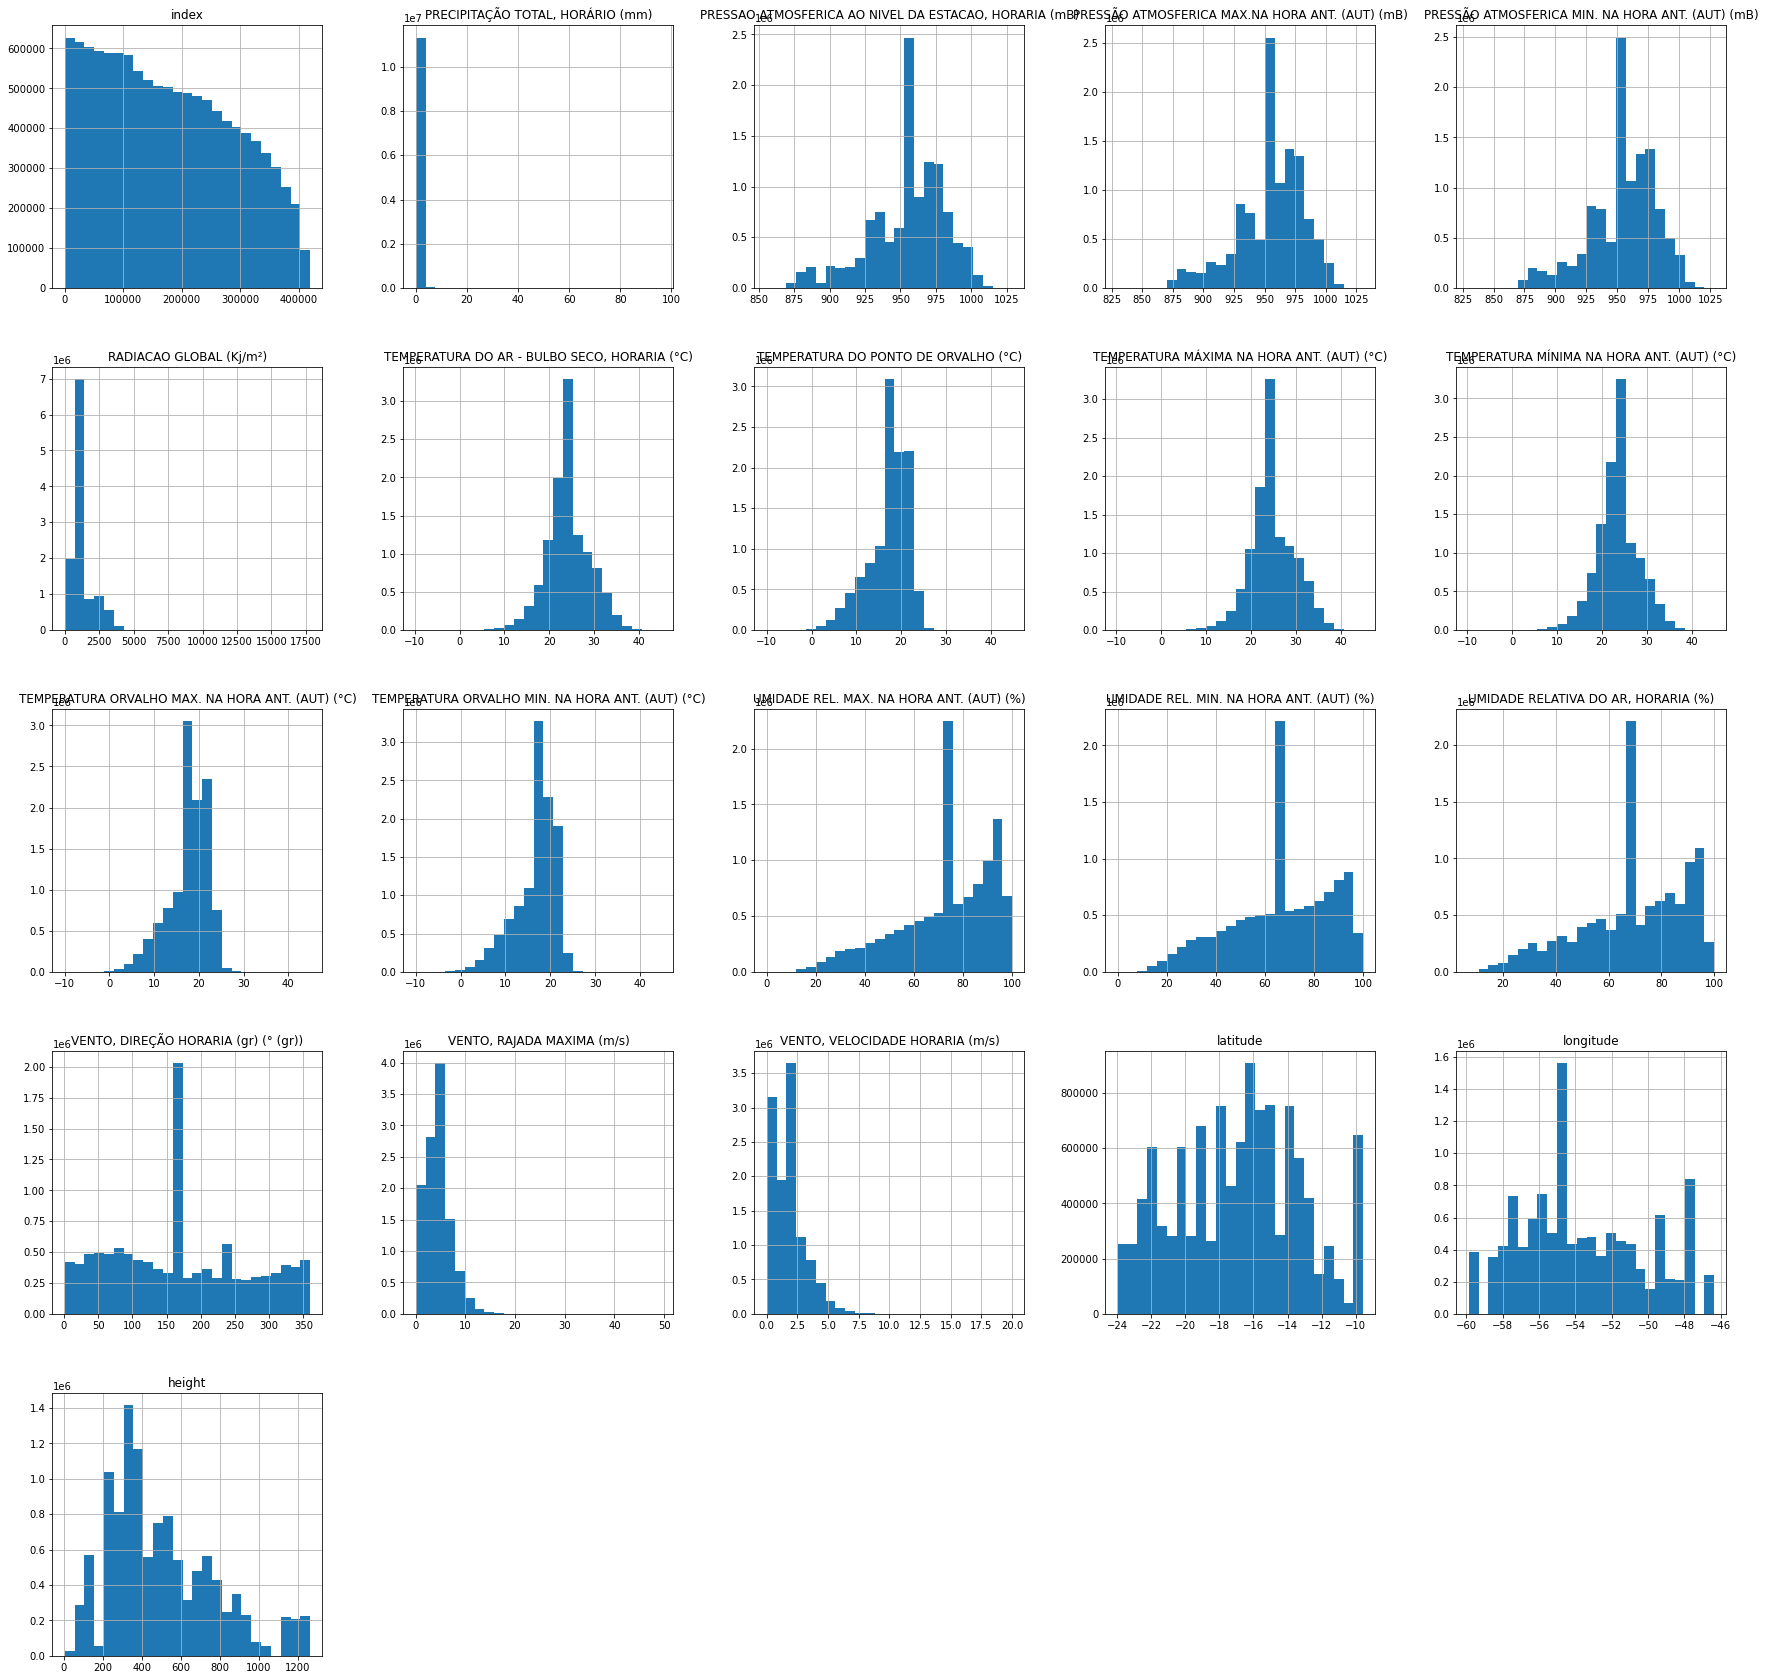

In [20]:
df_central_west_mean.hist(figsize = (30,30), bins=25)

CPU times: total: 15.8 s
Wall time: 16.1 s


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'),
  Text(2, 0, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'),
  Text(3, 0, 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'),
  Text(4, 0, 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'),
  Text(5, 0, 'RADIACAO GLOBAL (Kj/m²)'),
  Text(6, 0, 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'),
  Text(7, 0, 'TEMPERATURA DO PONTO DE ORVALHO (°C)'),
  Text(8, 0, 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'),
  Text(9, 0, 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'),
  Text(10, 0, 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'),
  Text(11, 0, 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'),
  Text(12, 0, 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'),
  Text(13, 0, 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'),
  Text(14, 0, 'UMIDADE RELATIVA DO AR, HORARIA (%)'),
  Text(15, 0, 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))'),
  Text(16, 0

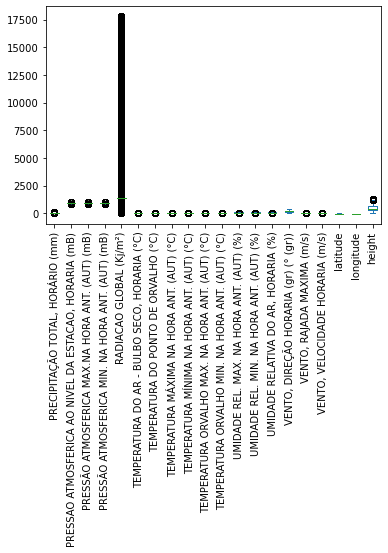

In [21]:
%%time
import matplotlib.pyplot as plt
df_central_west_mean.drop(columns = ['index']).plot.box()
plt.xticks(rotation=90)

### Imputasi Iteratif Median

In [22]:
from sklearn.impute import SimpleImputer
isNumeric =df_central_west.select_dtypes(include=np.number)
imputer_median = SimpleImputer(strategy='median')
# fit on the dataset
imputer_median.fit(isNumeric)
# transform the dataset
Xtrans_central_west_median = imputer_median.transform(isNumeric)
Xtrans_central_west_median

array([[ 1.38998000e+05,  0.00000000e+00,  8.99600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38999000e+05,  0.00000000e+00,  8.99200000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.39000000e+05,  0.00000000e+00,  8.98600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       ...,
       [ 1.38995000e+05,  0.00000000e+00,  8.99700000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38996000e+05,  0.00000000e+00,  8.99800000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38997000e+05,  0.00000000e+00,  8.99900000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03]])

In [23]:
columns = list(df_central_west.select_dtypes(include=np.number).columns)
df_central_west_median = df_central_west.copy()
for i in range(len(columns)):
    df_central_west_median[columns[i]]=Xtrans_central_west_median[:,i]
df_central_west_median

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",state,station,station_code,latitude,longitude,height
0,138998.0,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,...,59.0,39.0,9.6,3.9,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999.0,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,...,54.0,55.0,8.3,3.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000.0,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,...,49.0,62.0,8.3,3.6,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001.0,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,...,41.0,43.0,6.7,3.1,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002.0,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,...,43.0,98.0,6.4,3.5,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427115,138993.0,2017-12-20,09:00,0.0,898.8,898.8,898.5,29.0,18.4,15.8,...,85.0,72.0,3.5,1.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427116,138994.0,2017-12-20,10:00,0.0,899.4,899.4,898.8,557.0,20.3,16.9,...,81.0,69.0,3.5,1.8,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427117,138995.0,2017-12-20,11:00,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,...,72.0,83.0,7.6,4.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427118,138996.0,2017-12-20,12:00,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,...,70.0,59.0,7.6,3.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


### Visualisasi

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'}>,
        <AxesSubplot:title={'center':'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'}>],
       [<AxesSubplot:title={'center':'RADIACAO GLOBAL (Kj/m²)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO PONTO DE ORVALHO (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'}>],
       [<AxesSubplot:title={'center':'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'}>,
        <AxesS

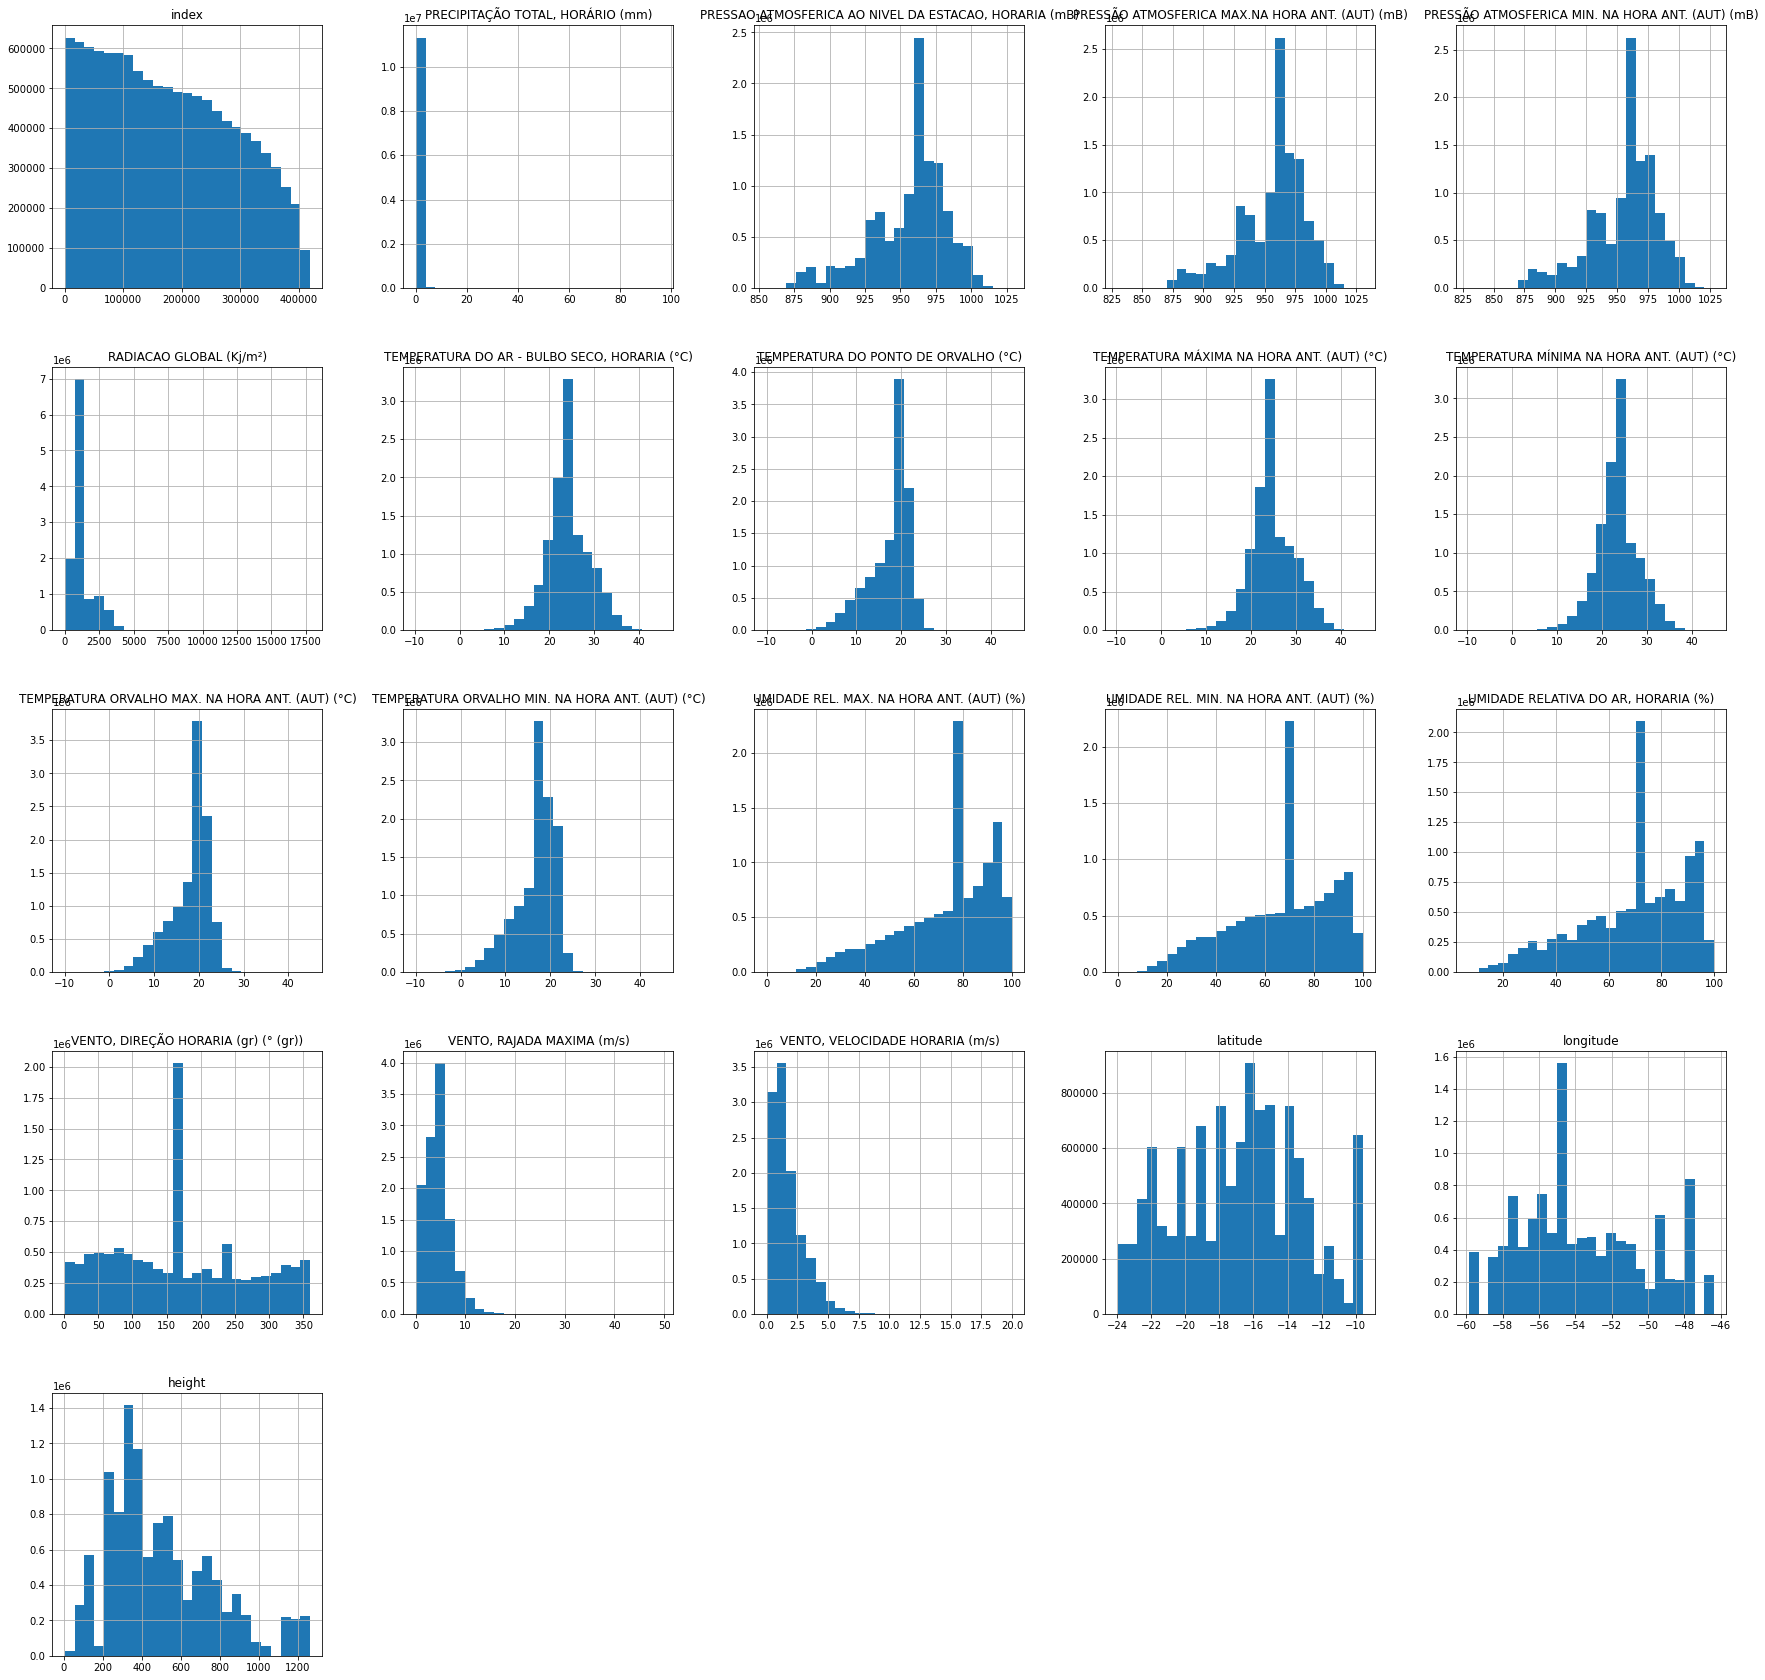

In [24]:
df_central_west_median.hist(figsize = (30,30), bins=25)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'),
  Text(2, 0, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'),
  Text(3, 0, 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'),
  Text(4, 0, 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'),
  Text(5, 0, 'RADIACAO GLOBAL (Kj/m²)'),
  Text(6, 0, 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'),
  Text(7, 0, 'TEMPERATURA DO PONTO DE ORVALHO (°C)'),
  Text(8, 0, 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'),
  Text(9, 0, 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'),
  Text(10, 0, 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'),
  Text(11, 0, 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'),
  Text(12, 0, 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'),
  Text(13, 0, 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'),
  Text(14, 0, 'UMIDADE RELATIVA DO AR, HORARIA (%)'),
  Text(15, 0, 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))'),
  Text(16, 0

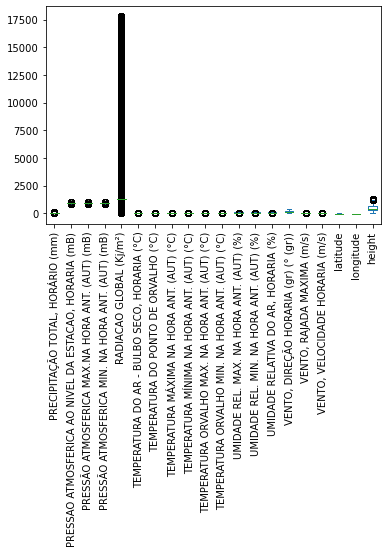

In [25]:
import matplotlib.pyplot as plt
df_central_west_median.drop(columns = ['index']).plot.box()
plt.xticks(rotation=90)

### Imputasi Iteratif most_frequent

In [18]:
from sklearn.impute import SimpleImputer
isNumeric =df_central_west.select_dtypes(include=np.number)
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
# fit on the dataset
imputer_most_frequent.fit(isNumeric)
# transform the dataset
Xtrans_central_west_most_frequent = imputer_most_frequent.transform(isNumeric)
Xtrans_central_west_most_frequent

array([[ 1.38998000e+05,  0.00000000e+00,  8.99600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38999000e+05,  0.00000000e+00,  8.99200000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.39000000e+05,  0.00000000e+00,  8.98600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       ...,
       [ 1.38995000e+05,  0.00000000e+00,  8.99700000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38996000e+05,  0.00000000e+00,  8.99800000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38997000e+05,  0.00000000e+00,  8.99900000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03]])

In [26]:
columns = list(df_central_west.select_dtypes(include=np.number).columns)
df_central_west_most_frequent = df_central_west.copy()
for i in range(len(columns)):
    df_central_west_most_frequent[columns[i]]=Xtrans_central_west_most_frequent[:,i]
df_central_west_most_frequent

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",state,station,station_code,latitude,longitude,height
0,138998.0,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,...,59.0,39.0,9.6,3.9,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999.0,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,...,54.0,55.0,8.3,3.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000.0,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,...,49.0,62.0,8.3,3.6,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001.0,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,...,41.0,43.0,6.7,3.1,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002.0,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,...,43.0,98.0,6.4,3.5,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427115,138993.0,2017-12-20,09:00,0.0,898.8,898.8,898.5,29.0,18.4,15.8,...,85.0,72.0,3.5,1.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427116,138994.0,2017-12-20,10:00,0.0,899.4,899.4,898.8,557.0,20.3,16.9,...,81.0,69.0,3.5,1.8,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427117,138995.0,2017-12-20,11:00,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,...,72.0,83.0,7.6,4.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427118,138996.0,2017-12-20,12:00,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,...,70.0,59.0,7.6,3.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


### Visualisasi

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'}>,
        <AxesSubplot:title={'center':'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'}>],
       [<AxesSubplot:title={'center':'RADIACAO GLOBAL (Kj/m²)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO PONTO DE ORVALHO (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'}>],
       [<AxesSubplot:title={'center':'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'}>,
        <AxesS

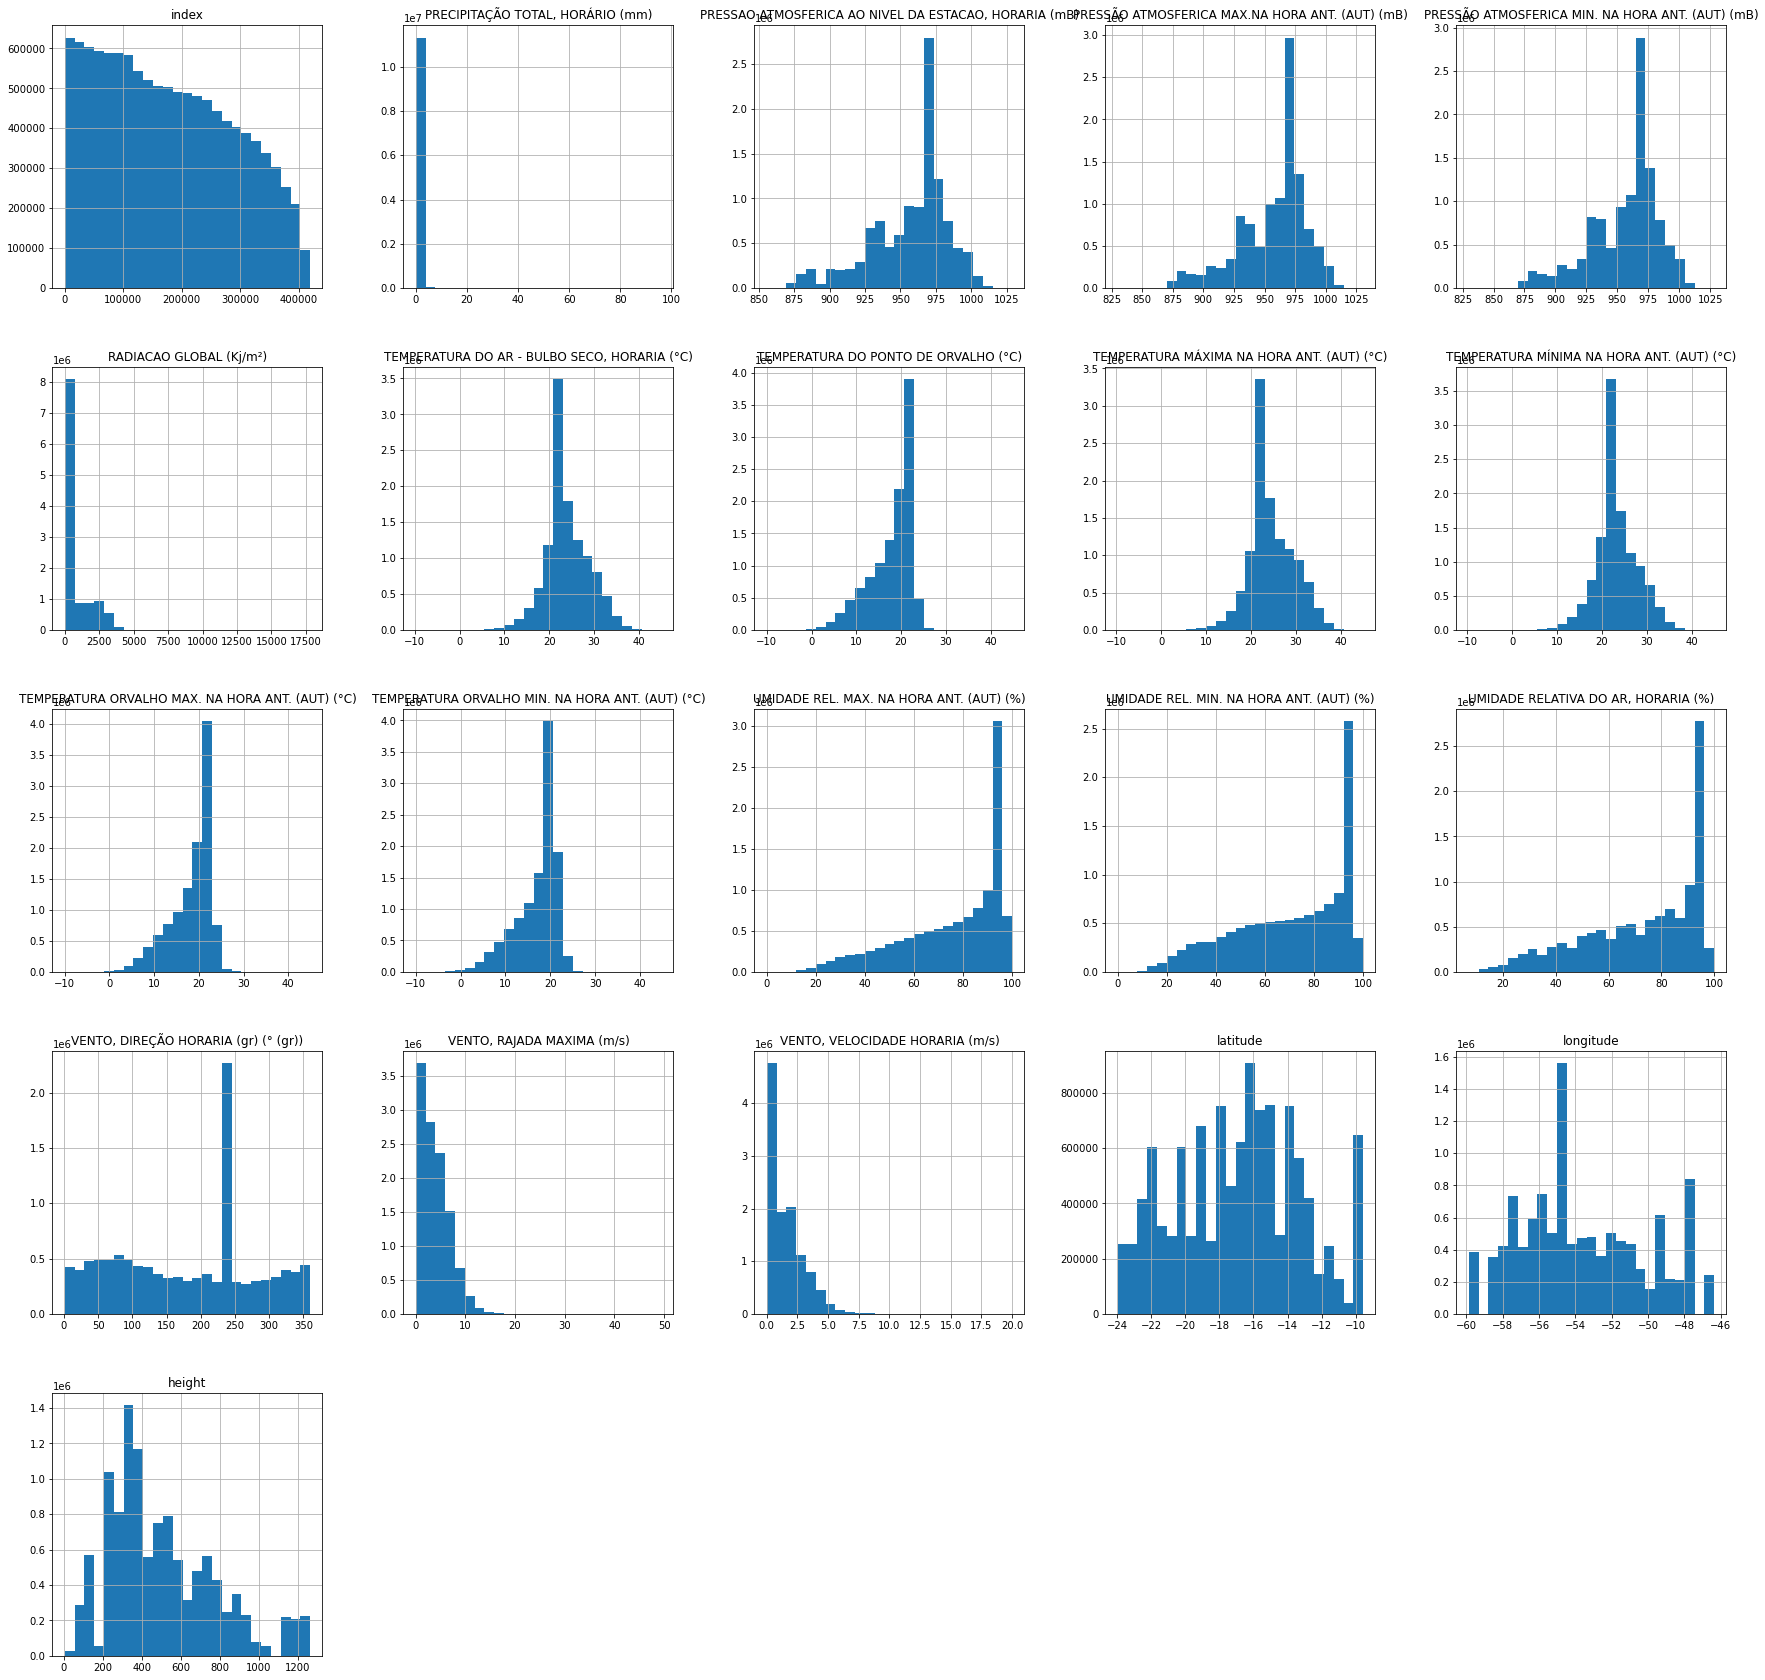

In [27]:
df_central_west_most_frequent.hist(figsize = (30,30), bins=25)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'),
  Text(2, 0, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'),
  Text(3, 0, 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'),
  Text(4, 0, 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'),
  Text(5, 0, 'RADIACAO GLOBAL (Kj/m²)'),
  Text(6, 0, 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'),
  Text(7, 0, 'TEMPERATURA DO PONTO DE ORVALHO (°C)'),
  Text(8, 0, 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'),
  Text(9, 0, 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'),
  Text(10, 0, 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'),
  Text(11, 0, 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'),
  Text(12, 0, 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'),
  Text(13, 0, 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'),
  Text(14, 0, 'UMIDADE RELATIVA DO AR, HORARIA (%)'),
  Text(15, 0, 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))'),
  Text(16, 0

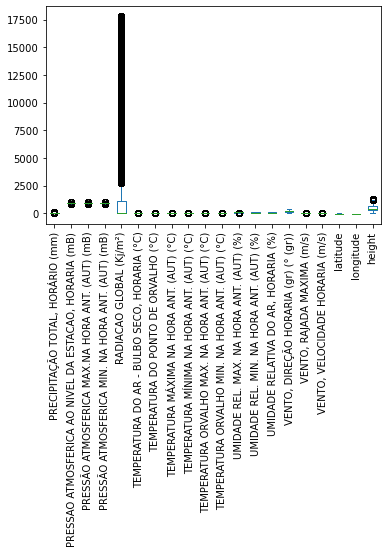

In [28]:
import matplotlib.pyplot as plt
df_central_west_most_frequent.drop(columns = ['index']).plot.box()
plt.xticks(rotation=90)

### Imputasi Iteratif constant

In [29]:
from sklearn.impute import SimpleImputer
isNumeric =df_central_west.select_dtypes(include=np.number)
imputer_constant = SimpleImputer(strategy='constant')
# fit on the dataset
imputer_constant.fit(isNumeric)
# transform the dataset
Xtrans_central_west_constant = imputer_constant.transform(isNumeric)
Xtrans_central_west_constant

array([[ 1.38998000e+05,  0.00000000e+00,  8.99600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38999000e+05,  0.00000000e+00,  8.99200000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.39000000e+05,  0.00000000e+00,  8.98600000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       ...,
       [ 1.38995000e+05,  0.00000000e+00,  8.99700000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38996000e+05,  0.00000000e+00,  8.99800000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03],
       [ 1.38997000e+05,  0.00000000e+00,  8.99900000e+02, ...,
        -1.60111111e+01, -4.75575000e+01,  1.04300000e+03]])

In [30]:
columns = list(df_central_west.select_dtypes(include=np.number).columns)
df_central_west_constant = df_central_west.copy()
for i in range(len(columns)):
    df_central_west_constant[columns[i]]=Xtrans_central_west_constant[:,i]
df_central_west_constant

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",state,station,station_code,latitude,longitude,height
0,138998.0,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,...,59.0,39.0,9.6,3.9,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999.0,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,...,54.0,55.0,8.3,3.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000.0,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,...,49.0,62.0,8.3,3.6,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001.0,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,...,41.0,43.0,6.7,3.1,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002.0,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,...,43.0,98.0,6.4,3.5,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427115,138993.0,2017-12-20,09:00,0.0,898.8,898.8,898.5,29.0,18.4,15.8,...,85.0,72.0,3.5,1.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427116,138994.0,2017-12-20,10:00,0.0,899.4,899.4,898.8,557.0,20.3,16.9,...,81.0,69.0,3.5,1.8,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427117,138995.0,2017-12-20,11:00,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,...,72.0,83.0,7.6,4.4,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
11427118,138996.0,2017-12-20,12:00,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,...,70.0,59.0,7.6,3.7,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


### Visualisasi

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'}>,
        <AxesSubplot:title={'center':'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'}>,
        <AxesSubplot:title={'center':'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'}>],
       [<AxesSubplot:title={'center':'RADIACAO GLOBAL (Kj/m²)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA DO PONTO DE ORVALHO (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'}>],
       [<AxesSubplot:title={'center':'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'}>,
        <AxesSubplot:title={'center':'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'}>,
        <AxesS

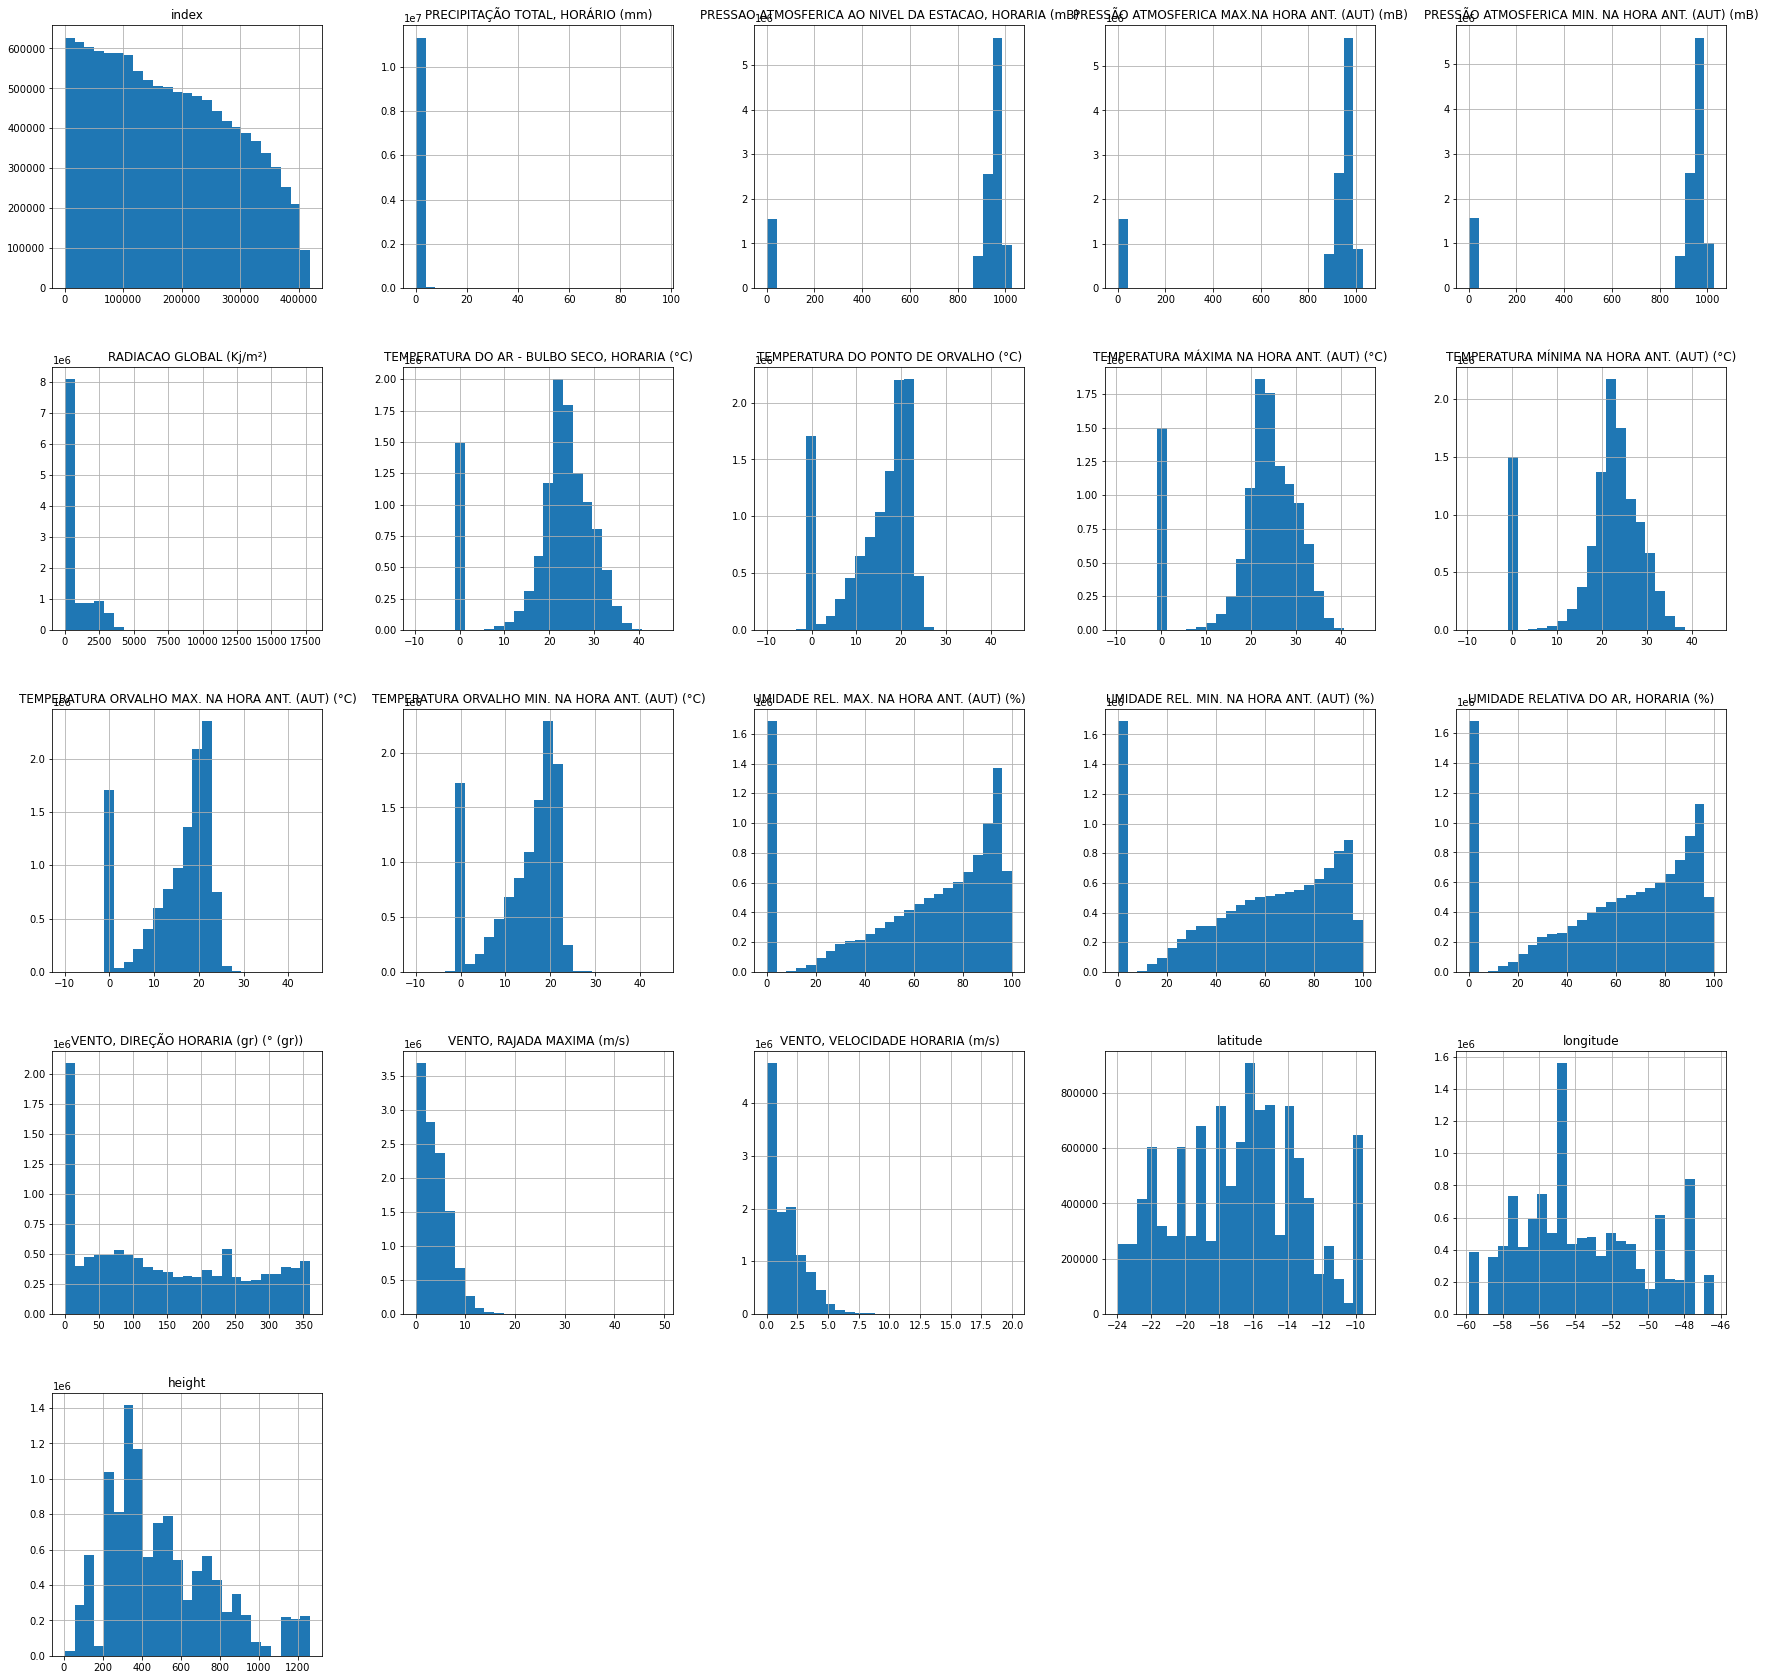

In [31]:
df_central_west_constant.hist(figsize = (30,30), bins=25)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'),
  Text(2, 0, 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'),
  Text(3, 0, 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'),
  Text(4, 0, 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'),
  Text(5, 0, 'RADIACAO GLOBAL (Kj/m²)'),
  Text(6, 0, 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'),
  Text(7, 0, 'TEMPERATURA DO PONTO DE ORVALHO (°C)'),
  Text(8, 0, 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'),
  Text(9, 0, 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'),
  Text(10, 0, 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'),
  Text(11, 0, 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'),
  Text(12, 0, 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'),
  Text(13, 0, 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'),
  Text(14, 0, 'UMIDADE RELATIVA DO AR, HORARIA (%)'),
  Text(15, 0, 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))'),
  Text(16, 0

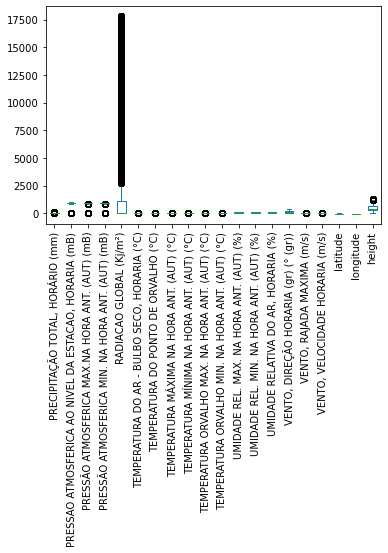

In [32]:
import matplotlib.pyplot as plt
df_central_west_constant.drop(columns = ['index']).plot.box()
plt.xticks(rotation=90)